In [1]:
%run useful_functions.py

C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:951: SyntaxWarning: invalid escape sequence '\s'
  item1A = re.sub('\s{2,}',' ', item1A)
C:\Users\natha\Desktop\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\17-Cyber-risk_and_the_cross-section_of_stock_returns-main\Work_Nathan\useful_functions.py:962: SyntaxWarning: invalid escape sequence '\s'
  document = re.sub('\s{2,}',' ', document)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


update 22


In [2]:
def transform_dictionary(input_dict):
    transformed_dict = {}
    for year, year_data in input_dict.items():
        year_scores = {}
        for ticker_data in year_data.values():
            for tactic, score in ticker_data.items():
                if tactic not in year_scores:
                    year_scores[tactic] = []
                year_scores[tactic].append(score)

        for tactic, scores_list in year_scores.items():
            if year not in transformed_dict:
                transformed_dict[year] = {}
            transformed_dict[year][tactic] = np.array(scores_list)

    return transformed_dict

In [3]:
def transform_scores(scores_dict):
    transformed_dict = {}

    for ticker, tactics_scores in scores_dict.items():
        for tactic, score in tactics_scores.items():
            if tactic not in transformed_dict:
                transformed_dict[tactic] = []

            transformed_dict[tactic].append(score)

    for tactic, scores_list in transformed_dict.items():
        transformed_dict[tactic] = np.array(scores_list)

    return transformed_dict

In [4]:
def cyber_score_dictionnary_construction(option="Overall"):
    #option="Overall"
    #option="14"
    #option="SuperTactic"
    #option="Sentiment"


    
    histo_dict={}
    
    years=np.arange(2007,2025) #!!!!!!!!
    for year in years:
        print("starting year ",year," ...")
        directory='../../data/10k_statements_new/similarity_with_MITRES/'+str(year)+'/'
    
    
    
        if option=="Overall":
            dict_cyber_score_for_this_year={}
                
        elif option=="Sentiment":
            dict_cyber_score_for_this_year={}
            
        elif option=="14":
            nested_dict_cyber_score_for_this_year={}
            
        elif option=="SuperTactic":
            nested_dict_cyber_score_for_this_year={}
        
    
    
        
        for matrix_name in tqdm(os.listdir(directory)):
            ticker=matrix_name.split('_')[0]
            if "TSLA" in matrix_name or "AAPL" in matrix_name or True:
                arr=np.load(directory+matrix_name)
                cosim=arr['arr']
        
               
        
                if option=="Overall":
                    
                    histo_cyber=np.max(cosim,axis=1)
                    cyber_score=select_cyber_score_from_histo(histo_cyber)
    
                    dict_cyber_score_for_this_year[ticker]=cyber_score
                    
    
                
                elif option=="Sentiment":
                    histo_cyber=np.max(cosim,axis=1)
                  
                    
                    directory_sentiment='../../data/10k_statements_new/risk_occurences/'+str(year)+'/'+ticker+'_risk_occurences.txt'
                    sentiment_array=np.loadtxt(directory_sentiment)
                    sentiment_array[sentiment_array>0]=1
    
                    dict_cyber_score_for_this_year[ticker]=np.max(histo_cyber*sentiment_array)
                    
                    
                elif option=="14":
                    dict_cosim=splitter_of_cos_matrix_into_tactics(cosim)
    
                    sub_dict={}
                    for tactic in list(dict_cosim.keys()):
                        sub_dict[tactic]=select_cyber_score_from_histo(np.max(dict_cosim[tactic],axis=1))
    
                    nested_dict_cyber_score_for_this_year[ticker]=sub_dict
                    
                elif option=="SuperTactic":
                    dict_cosim=splitter_of_cos_matrix_into_tactics(cosim)
    
                    dict_cosim=organize_in_super_tactic(dict_cosim) 
    
                    sub_dict={}
                    for tactic in list(dict_cosim.keys()):
                        sub_dict[tactic]=select_cyber_score_from_histo(np.max(dict_cosim[tactic],axis=1))
    
                    nested_dict_cyber_score_for_this_year[ticker]=sub_dict
                    
          
        if option=="Overall":
            #construct histo array
            histo_dict[str(year)]=np.array(list(dict_cyber_score_for_this_year.values()))
                
        elif option=="Sentiment":
            #construct histo array
            histo_dict[str(year)]=np.array(list(dict_cyber_score_for_this_year.values()))
            
        elif option=="14":
            #construct histo array
            histo_dict[str(year)]=transform_scores(nested_dict_cyber_score_for_this_year)
            
        elif option=="SuperTactic":
            #construct histo array
            histo_dict[str(year)]=transform_scores(nested_dict_cyber_score_for_this_year)

    
    return histo_dict

In [5]:
def percentile_stats(values):
    # Calculate percentiles
    percentiles1 = np.percentile(values, [99, 95, 90])
    percentiles2 = np.percentile(values, [10, 5, 1])
    
    # Calculate mean
    mean = np.mean(values)
    
    # Combine percentiles and mean into a list
    stats = list(percentiles1) + [mean] + list(percentiles2)
    
    return stats

In [6]:
def CI_stats(values):
    # Calculate sample standard deviation
    sample_std = np.std(values, ddof=1)  # ddof=1 for sample standard deviation
    
    # Calculate number of observations
    n = len(values)
    
    # Calculate standard error
    se = sample_std / np.sqrt(n)

    mean = np.mean(values)

    se90=1.645*se
    se95=1.96*se
    se99=2.575*se

    return [se99+mean,se95+mean,se90+mean,mean,-se90+mean,-se95+mean,-se99+mean]
    

# Preparation of dictionary

In [7]:
histo_cyber_overall=cyber_score_dictionnary_construction()

starting year  2007  ...


  0%|          | 0/3279 [00:00<?, ?it/s]

starting year  2008  ...


  0%|          | 0/3343 [00:00<?, ?it/s]

starting year  2009  ...


  0%|          | 0/3542 [00:00<?, ?it/s]

starting year  2010  ...


  0%|          | 0/3472 [00:00<?, ?it/s]

starting year  2011  ...


  0%|          | 0/3432 [00:00<?, ?it/s]

starting year  2012  ...


  0%|          | 0/3413 [00:00<?, ?it/s]

starting year  2013  ...


  0%|          | 0/3404 [00:00<?, ?it/s]

starting year  2014  ...


  0%|          | 0/3491 [00:00<?, ?it/s]

starting year  2015  ...


  0%|          | 0/3618 [00:00<?, ?it/s]

starting year  2016  ...


  0%|          | 0/3657 [00:00<?, ?it/s]

starting year  2017  ...


  0%|          | 0/3704 [00:00<?, ?it/s]

starting year  2018  ...


  0%|          | 0/3820 [00:00<?, ?it/s]

starting year  2019  ...


  0%|          | 0/3939 [00:00<?, ?it/s]

starting year  2020  ...


  0%|          | 0/4076 [00:00<?, ?it/s]

starting year  2021  ...


  0%|          | 0/4512 [00:00<?, ?it/s]

starting year  2022  ...


  0%|          | 0/5289 [00:00<?, ?it/s]

starting year  2023  ...


  0%|          | 0/4996 [00:00<?, ?it/s]

starting year  2024  ...


  0%|          | 0/2014 [00:00<?, ?it/s]

In [8]:
file_path = "cyber_score_dictionnary/Overall_cyber_score.pkl"

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Use pickle.dump() to serialize the dictionary and save it to the file
    pickle.dump(histo_cyber_overall, file)

In [9]:
histo_cyber_sentiment=cyber_score_dictionnary_construction("Sentiment")

starting year  2007  ...


  0%|          | 0/3279 [00:00<?, ?it/s]

starting year  2008  ...


  0%|          | 0/3343 [00:00<?, ?it/s]

starting year  2009  ...


  0%|          | 0/3542 [00:00<?, ?it/s]

starting year  2010  ...


  0%|          | 0/3472 [00:00<?, ?it/s]

starting year  2011  ...


  0%|          | 0/3432 [00:00<?, ?it/s]

starting year  2012  ...


  0%|          | 0/3413 [00:00<?, ?it/s]

starting year  2013  ...


  0%|          | 0/3404 [00:00<?, ?it/s]

starting year  2014  ...


  0%|          | 0/3491 [00:00<?, ?it/s]

starting year  2015  ...


  0%|          | 0/3618 [00:00<?, ?it/s]

starting year  2016  ...


  0%|          | 0/3657 [00:00<?, ?it/s]

starting year  2017  ...


  0%|          | 0/3704 [00:00<?, ?it/s]

starting year  2018  ...


  0%|          | 0/3820 [00:00<?, ?it/s]

starting year  2019  ...


  0%|          | 0/3939 [00:00<?, ?it/s]

starting year  2020  ...


  0%|          | 0/4076 [00:00<?, ?it/s]

starting year  2021  ...


  0%|          | 0/4512 [00:00<?, ?it/s]

starting year  2022  ...


  0%|          | 0/5289 [00:00<?, ?it/s]

starting year  2023  ...


  0%|          | 0/4996 [00:00<?, ?it/s]

starting year  2024  ...


  0%|          | 0/2014 [00:00<?, ?it/s]

In [10]:
file_path = "cyber_score_dictionnary/Sentiment_cyber_score.pkl"

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Use pickle.dump() to serialize the dictionary and save it to the file
    pickle.dump(histo_cyber_sentiment, file)

In [11]:
histo_cyber_14=cyber_score_dictionnary_construction("14")

starting year  2007  ...


  0%|          | 0/3279 [00:00<?, ?it/s]

starting year  2008  ...


  0%|          | 0/3343 [00:00<?, ?it/s]

starting year  2009  ...


  0%|          | 0/3542 [00:00<?, ?it/s]

starting year  2010  ...


  0%|          | 0/3472 [00:00<?, ?it/s]

starting year  2011  ...


  0%|          | 0/3432 [00:00<?, ?it/s]

starting year  2012  ...


  0%|          | 0/3413 [00:00<?, ?it/s]

starting year  2013  ...


  0%|          | 0/3404 [00:00<?, ?it/s]

starting year  2014  ...


  0%|          | 0/3491 [00:00<?, ?it/s]

starting year  2015  ...


  0%|          | 0/3618 [00:00<?, ?it/s]

starting year  2016  ...


  0%|          | 0/3657 [00:00<?, ?it/s]

starting year  2017  ...


  0%|          | 0/3704 [00:00<?, ?it/s]

starting year  2018  ...


  0%|          | 0/3820 [00:00<?, ?it/s]

starting year  2019  ...


  0%|          | 0/3939 [00:00<?, ?it/s]

starting year  2020  ...


  0%|          | 0/4076 [00:00<?, ?it/s]

starting year  2021  ...


  0%|          | 0/4512 [00:00<?, ?it/s]

starting year  2022  ...


  0%|          | 0/5289 [00:00<?, ?it/s]

starting year  2023  ...


  0%|          | 0/4996 [00:00<?, ?it/s]

starting year  2024  ...


  0%|          | 0/2014 [00:00<?, ?it/s]

In [12]:
file_path = "cyber_score_dictionnary/14_cyber_score.pkl"

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Use pickle.dump() to serialize the dictionary and save it to the file
    pickle.dump(histo_cyber_14, file)

In [13]:
histo_cyber_super=cyber_score_dictionnary_construction("SuperTactic")

starting year  2007  ...


  0%|          | 0/3279 [00:00<?, ?it/s]

starting year  2008  ...


  0%|          | 0/3343 [00:00<?, ?it/s]

starting year  2009  ...


  0%|          | 0/3542 [00:00<?, ?it/s]

starting year  2010  ...


  0%|          | 0/3472 [00:00<?, ?it/s]

starting year  2011  ...


  0%|          | 0/3432 [00:00<?, ?it/s]

starting year  2012  ...


  0%|          | 0/3413 [00:00<?, ?it/s]

starting year  2013  ...


  0%|          | 0/3404 [00:00<?, ?it/s]

starting year  2014  ...


  0%|          | 0/3491 [00:00<?, ?it/s]

starting year  2015  ...


  0%|          | 0/3618 [00:00<?, ?it/s]

starting year  2016  ...


  0%|          | 0/3657 [00:00<?, ?it/s]

starting year  2017  ...


  0%|          | 0/3704 [00:00<?, ?it/s]

starting year  2018  ...


  0%|          | 0/3820 [00:00<?, ?it/s]

starting year  2019  ...


  0%|          | 0/3939 [00:00<?, ?it/s]

starting year  2020  ...


  0%|          | 0/4076 [00:00<?, ?it/s]

starting year  2021  ...


  0%|          | 0/4512 [00:00<?, ?it/s]

starting year  2022  ...


  0%|          | 0/5289 [00:00<?, ?it/s]

starting year  2023  ...


  0%|          | 0/4996 [00:00<?, ?it/s]

starting year  2024  ...


  0%|          | 0/2014 [00:00<?, ?it/s]

In [14]:
file_path = "cyber_score_dictionnary/super_cyber_score.pkl"

# Open a file in binary write mode
with open(file_path, 'wb') as file:
    # Use pickle.dump() to serialize the dictionary and save it to the file
    pickle.dump(histo_cyber_super, file)

# Overall cyber score

In [7]:
file_path = "cyber_score_dictionnary/Overall_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber = pickle.load(file)


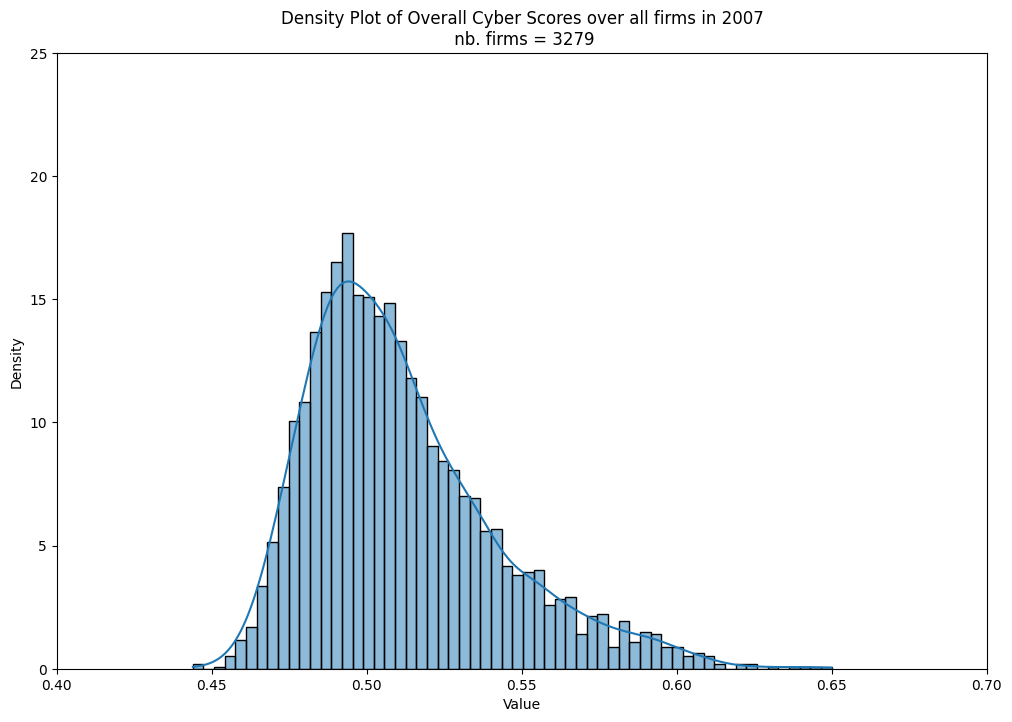

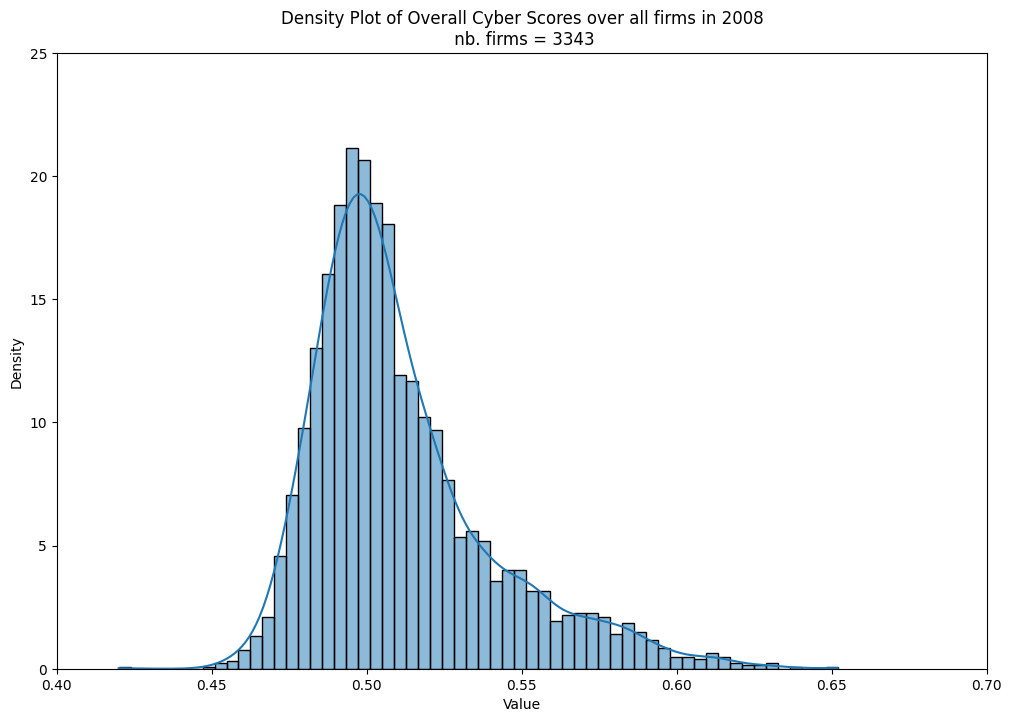

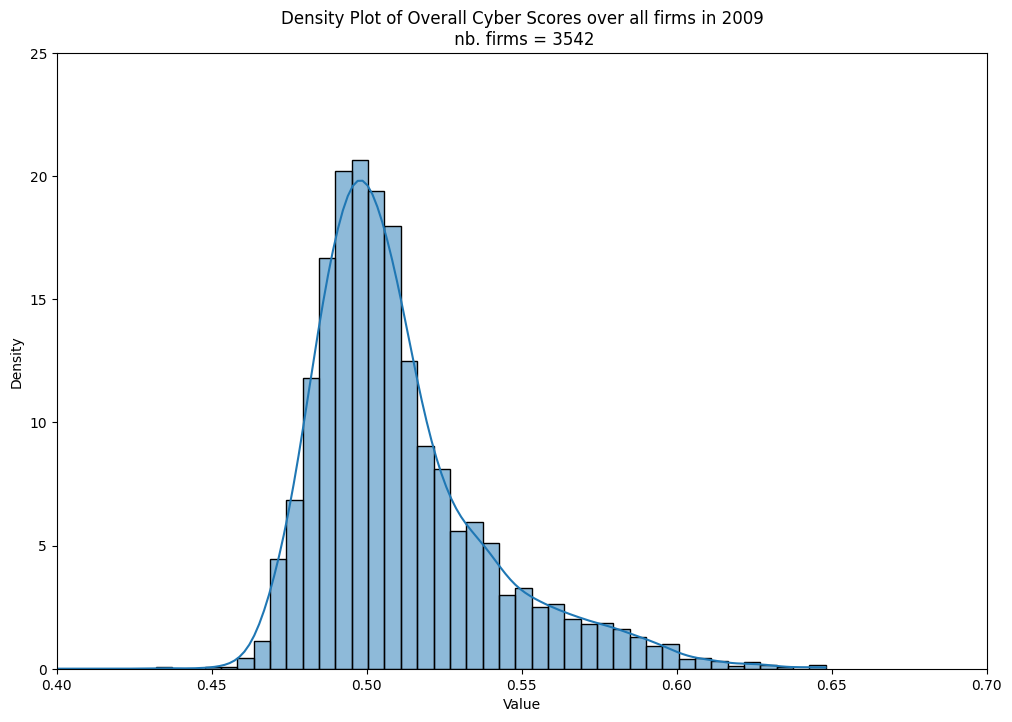

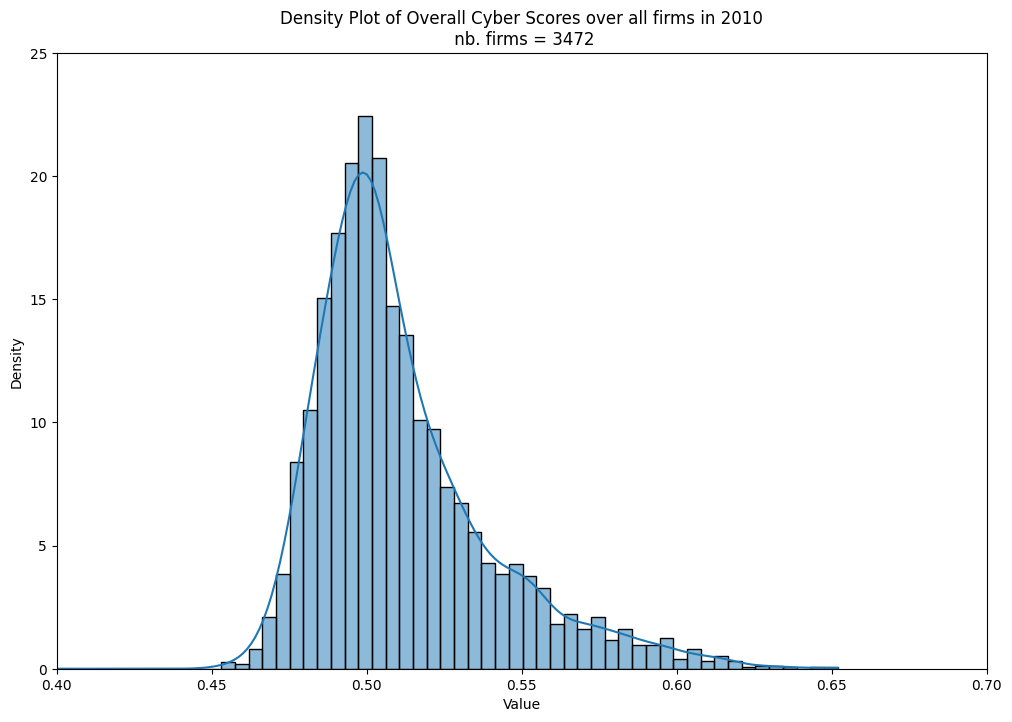

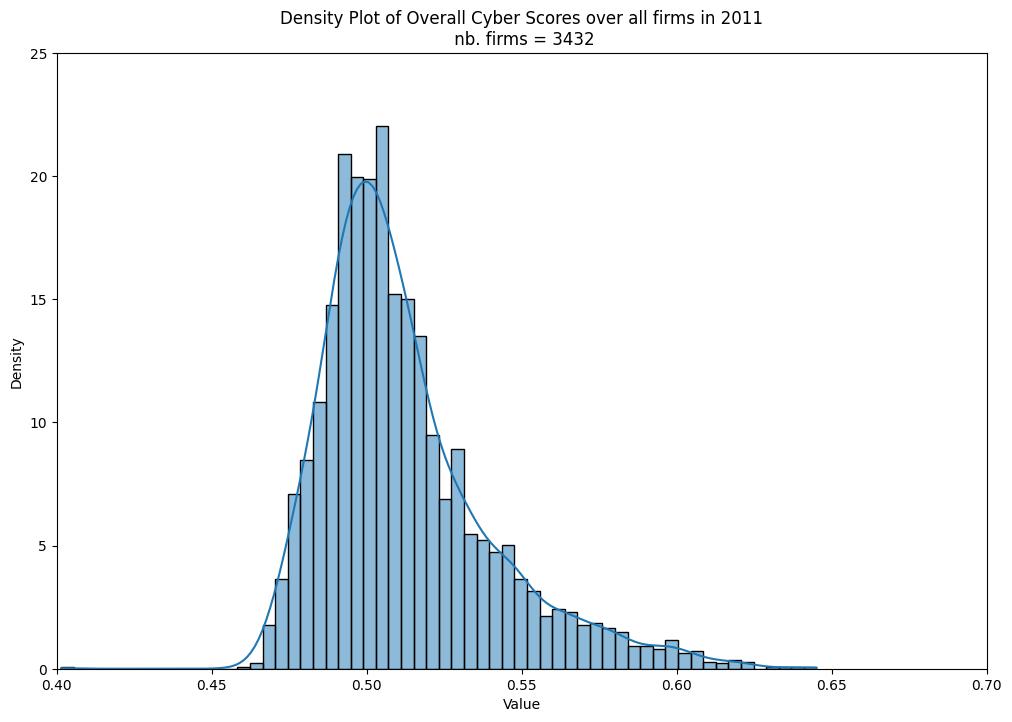

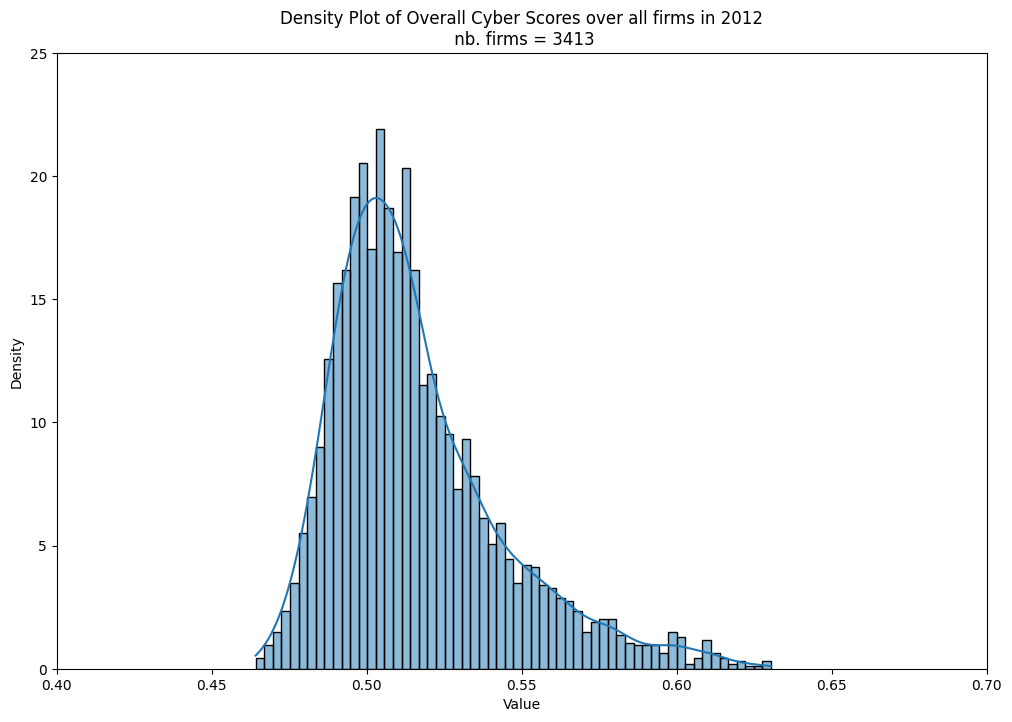

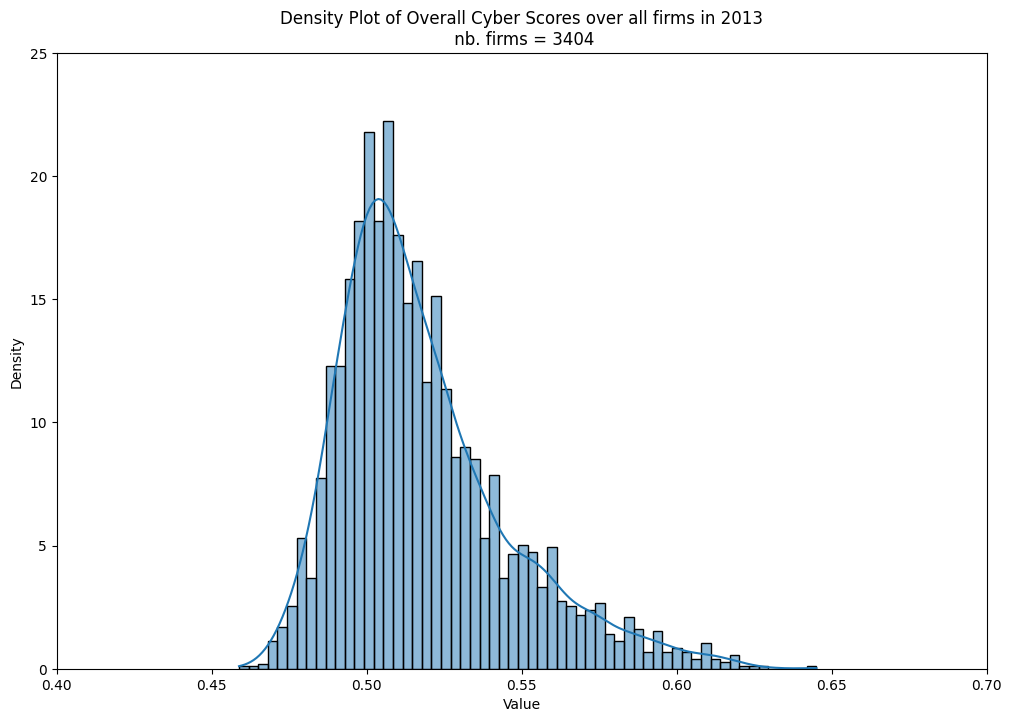

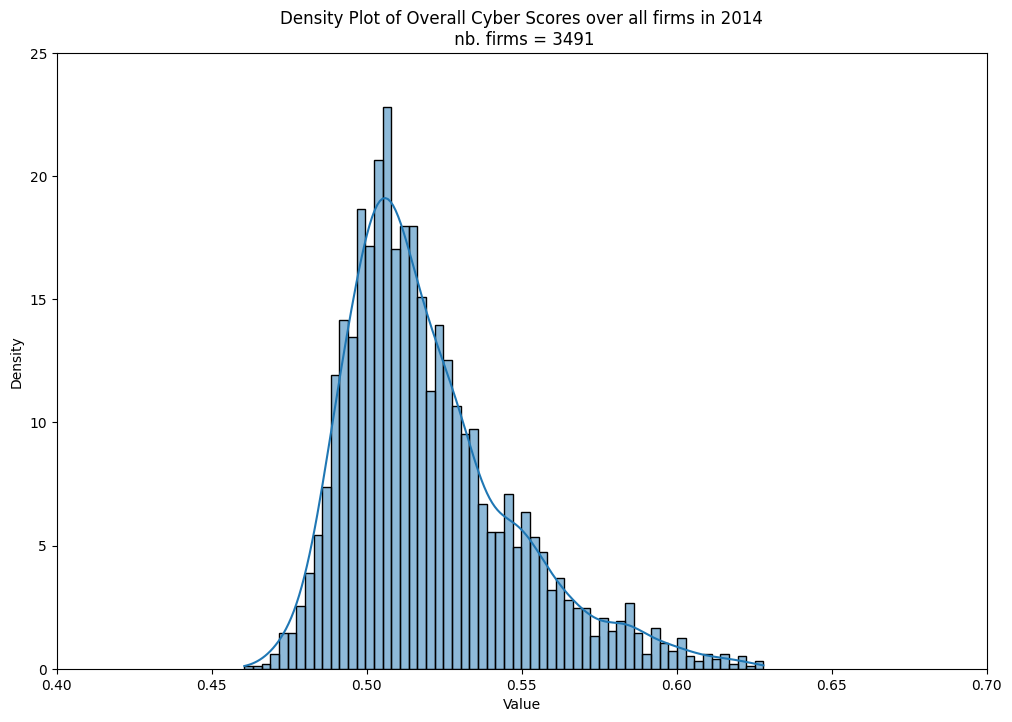

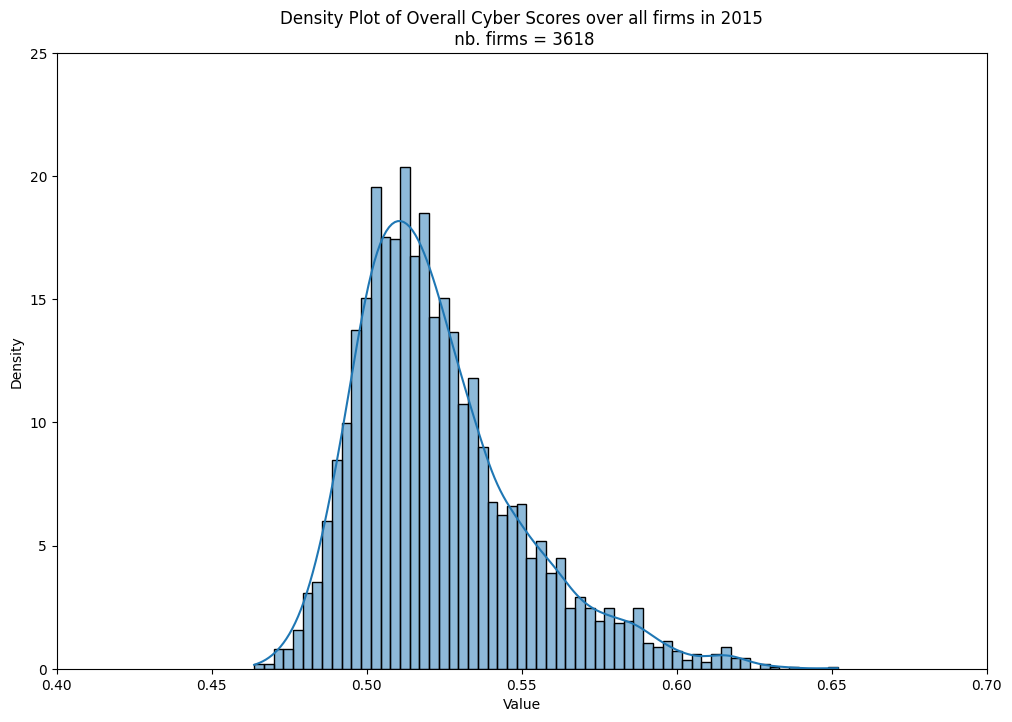

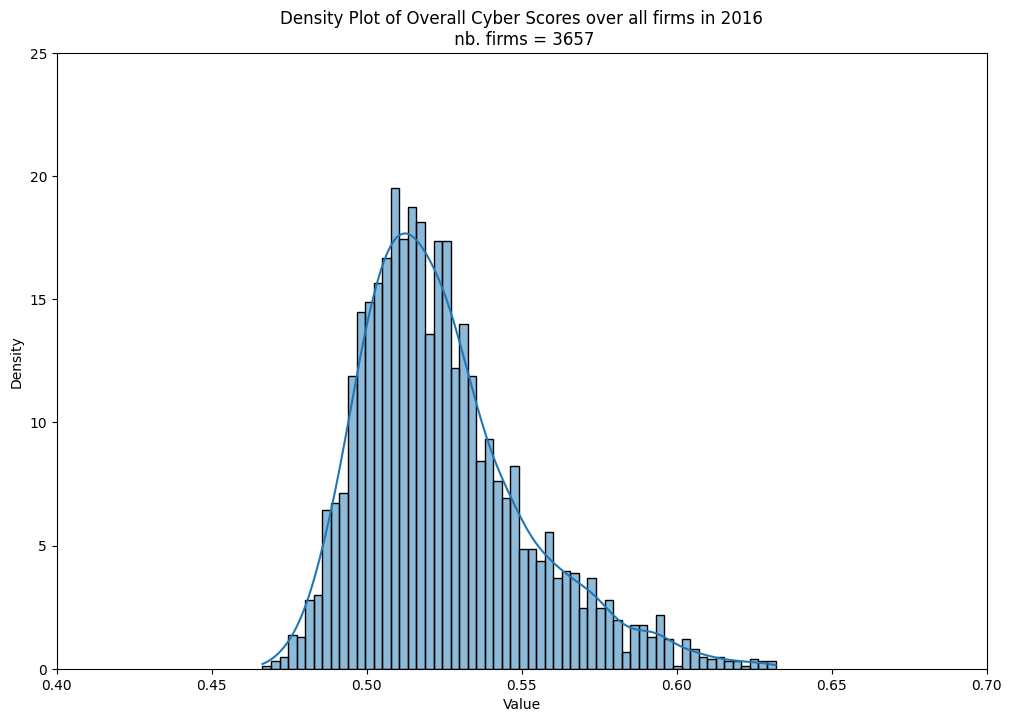

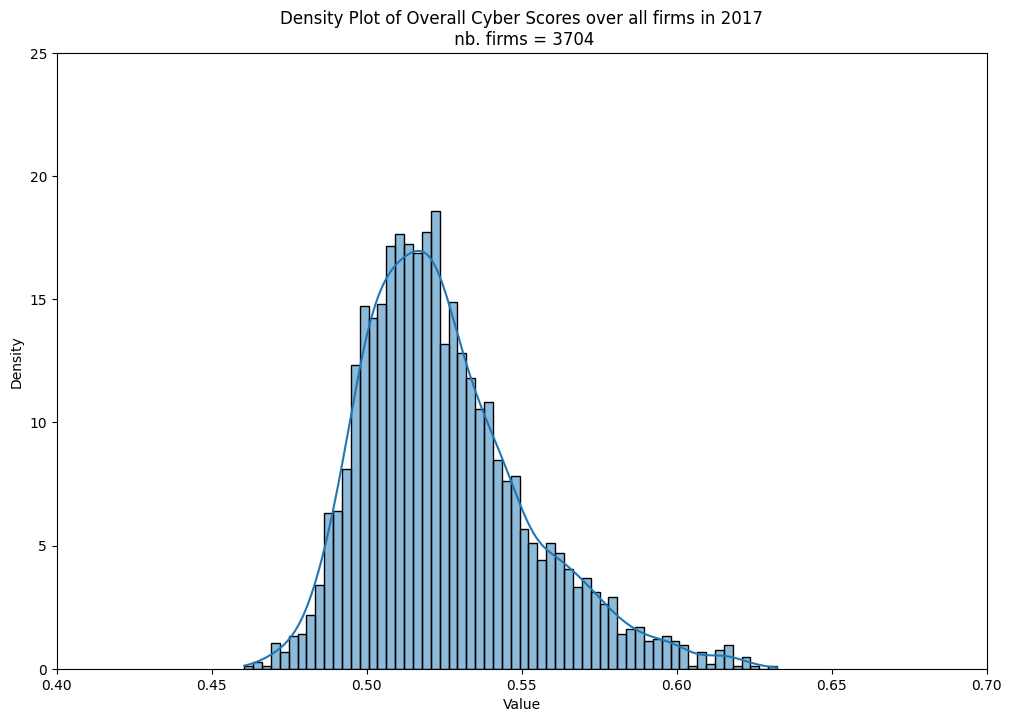

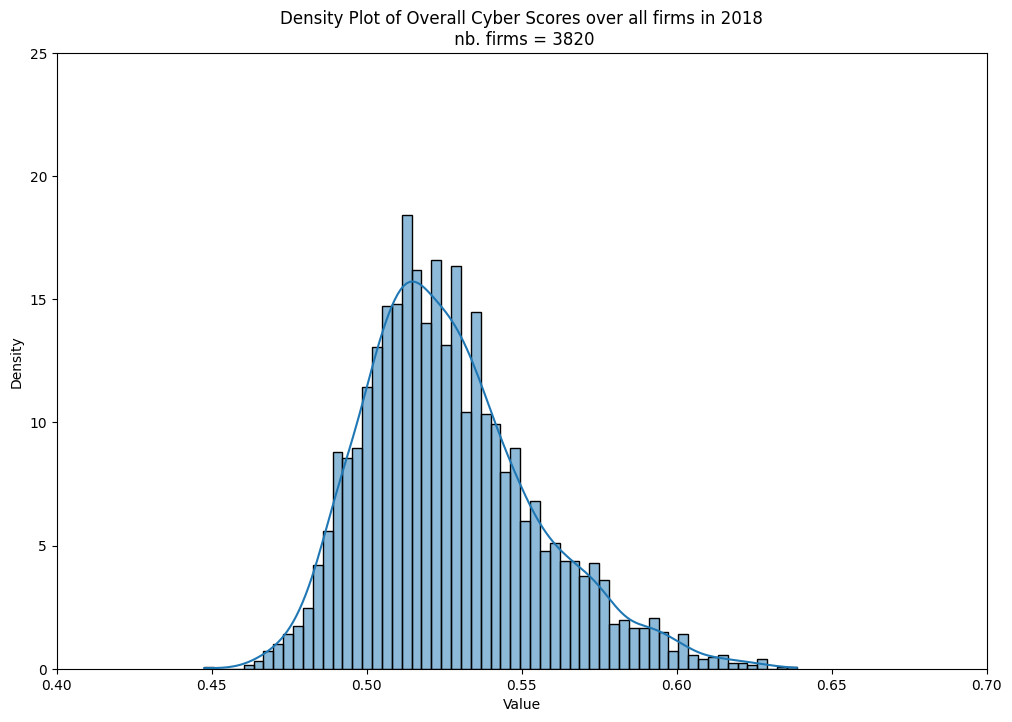

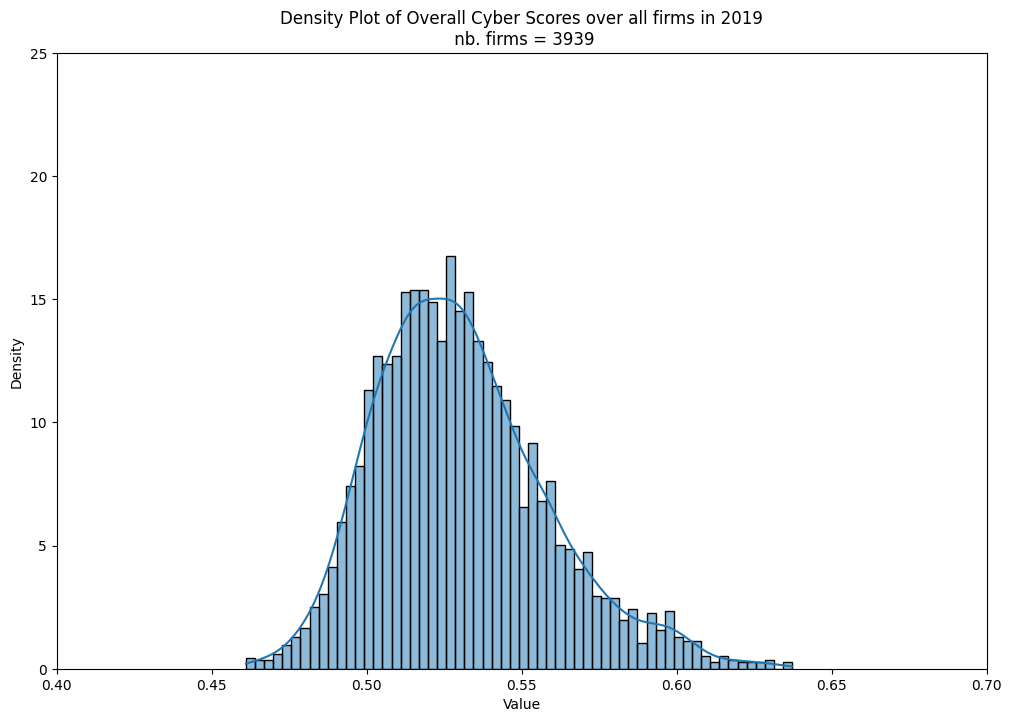

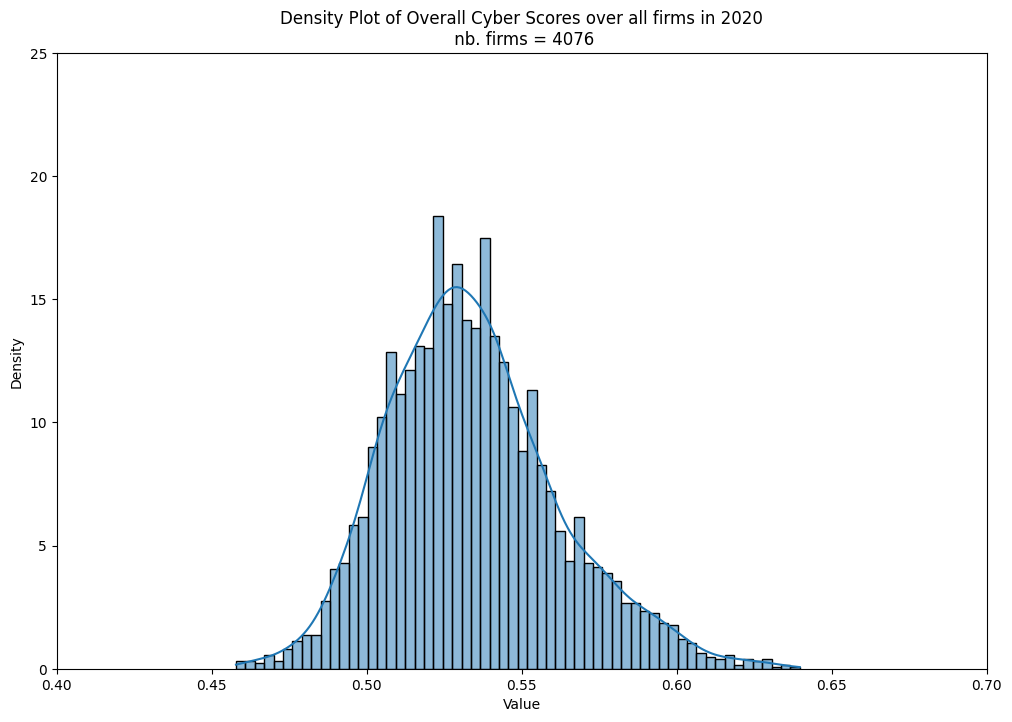

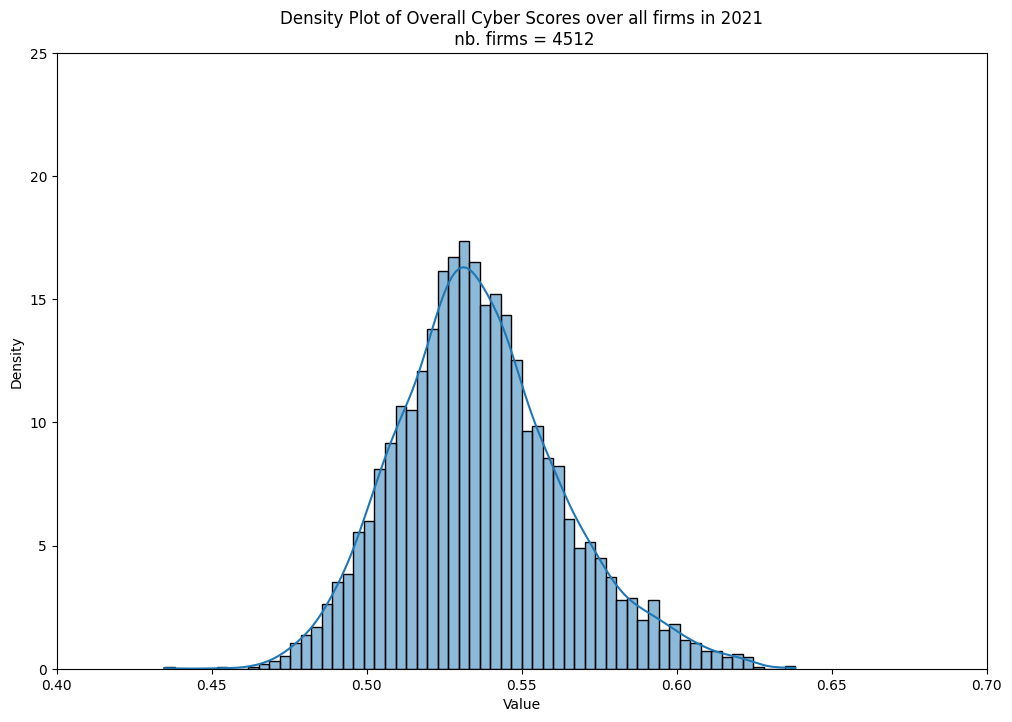

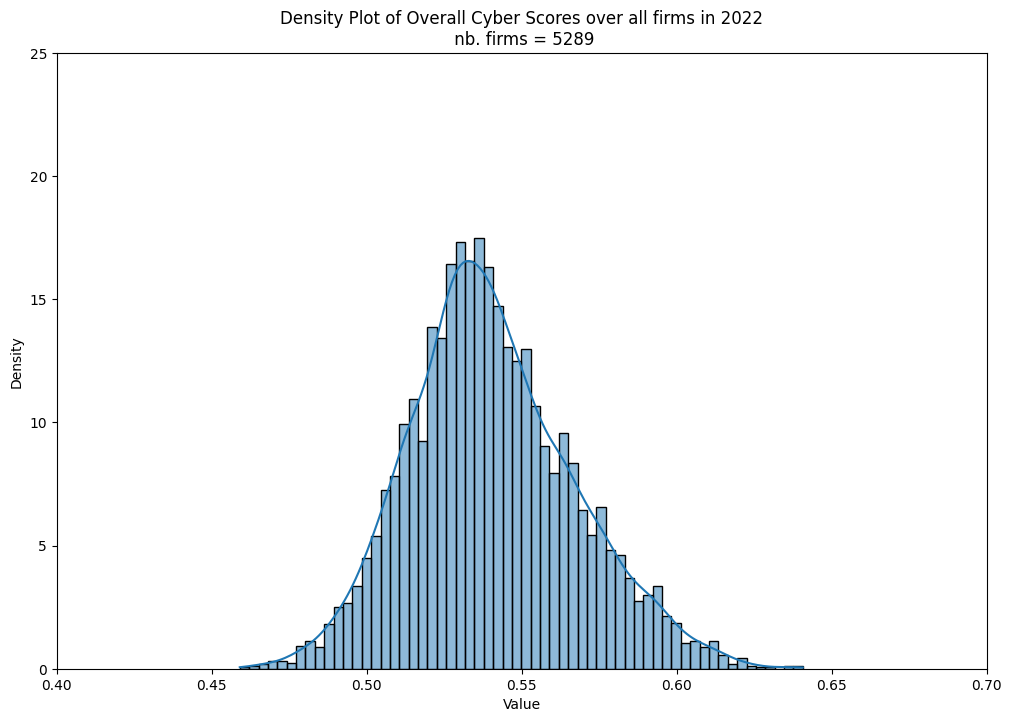

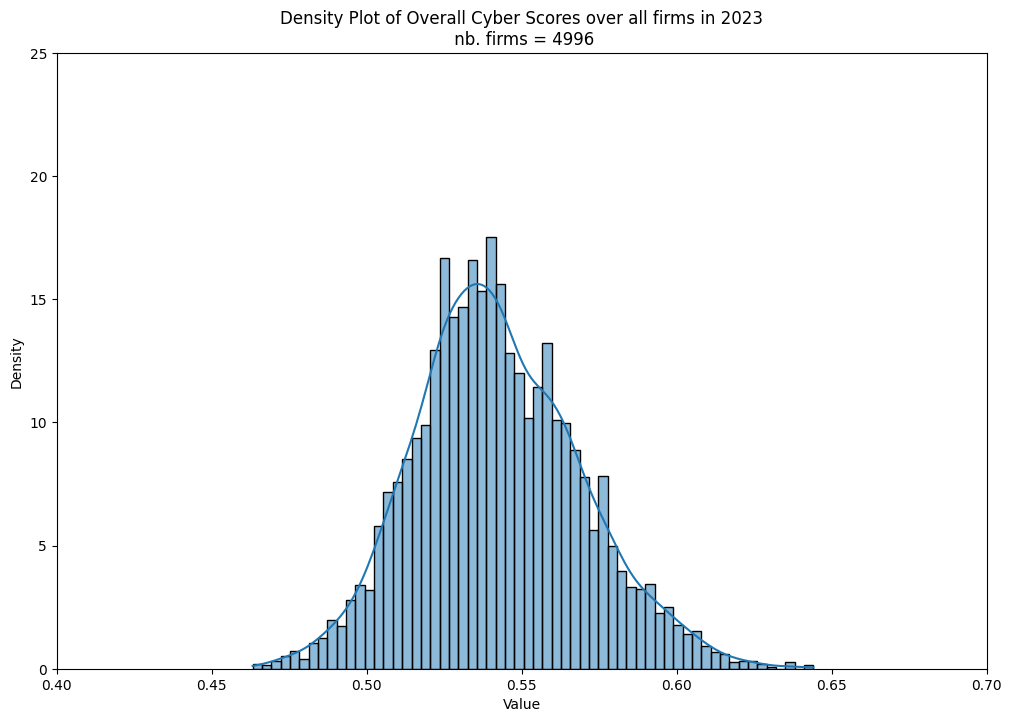

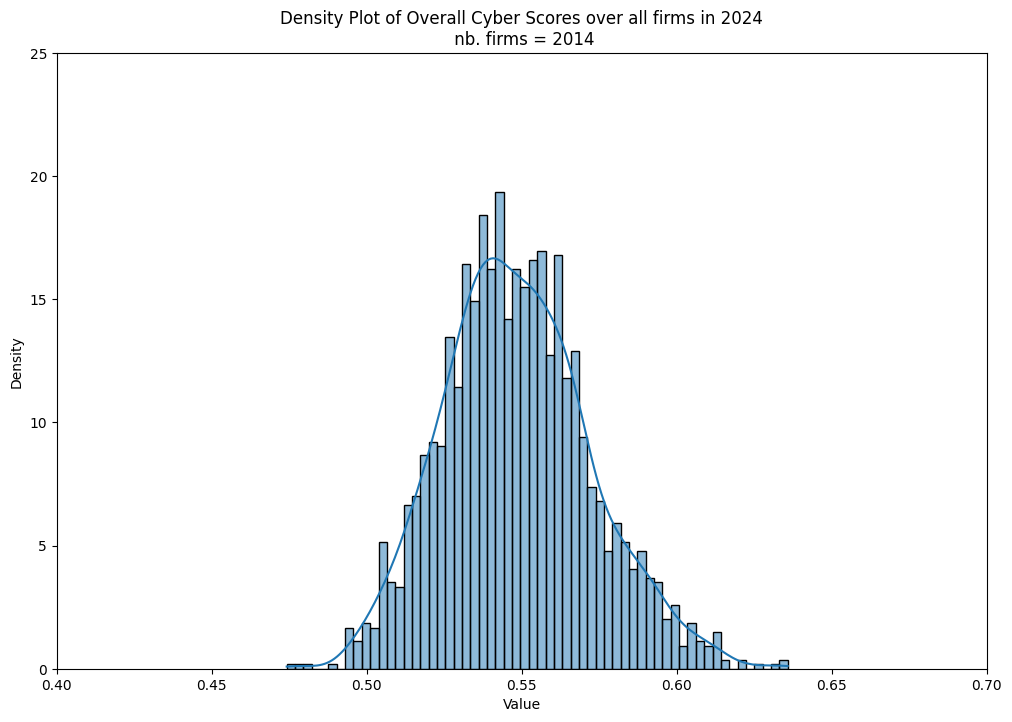

In [8]:
years = np.arange(2007, 2025)
aggregate_cyber_score = []
aggregate_cyber_score_bis = []
for year in years:
    sns.histplot(histo_cyber[str(year)], bins=60, kde=True, edgecolor='black', stat='density')
    plt.title('Density Plot of Overall Cyber Scores over all firms in ' + str(year) + "\n nb. firms = " + str(histo_cyber[str(year)].shape[0]))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim([0.4, 0.7])
    plt.ylim([0,25])

    # Save the plot
    plot_path = "cyber_score_dictionnary/overall_cyber_score_density_" + str(year) + ".png"
    plt.savefig(plot_path)
    
    # Show the plot (optional)
    plt.show()

    aggregate_cyber_score.append(percentile_stats(histo_cyber[str(year)]))
    aggregate_cyber_score_bis.append(CI_stats(histo_cyber[str(year)]))

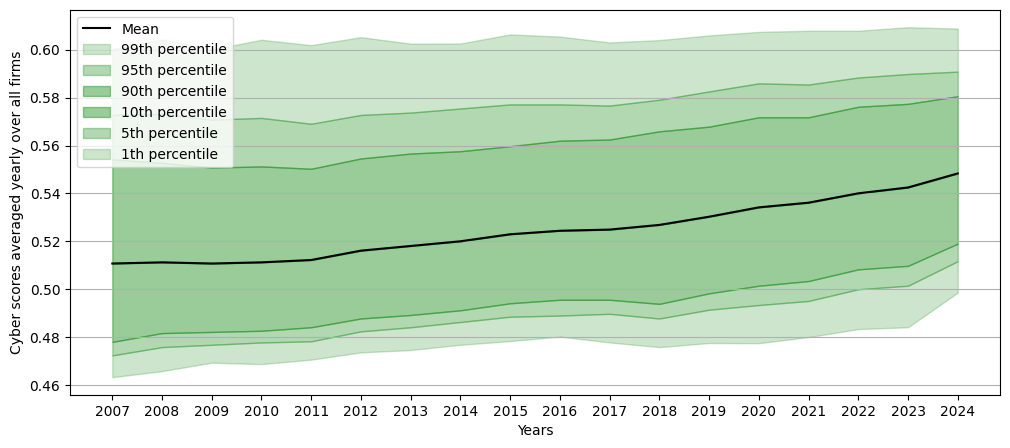

In [9]:
# Plotting
plt.figure(figsize=(12, 5)) 

# Plot mean line
plt.plot(years, [stats[3] for stats in aggregate_cyber_score], label='Mean',color='black')

# Fill between percentiles with gradient colors
for i, p in enumerate([99, 95, 90]):
    lab=str(p)+"th percentile"
    plt.fill_between(years, [stats[i] for stats in aggregate_cyber_score], [stats[i+1] for stats in aggregate_cyber_score], alpha=0.2+i*0.1,color='green',label=lab)

for i, p in enumerate([10, 5, 1]):
    lab=str(p)+"th percentile"
    plt.fill_between(years, [stats[3+i] for stats in aggregate_cyber_score], [stats[3+i+1] for stats in aggregate_cyber_score], alpha=0.2+(2-i)*0.1,color='green',label=lab)


#plt.title("Evolution of overall cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
#plt.yticks([0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.legend(loc='upper left')
plt.show()

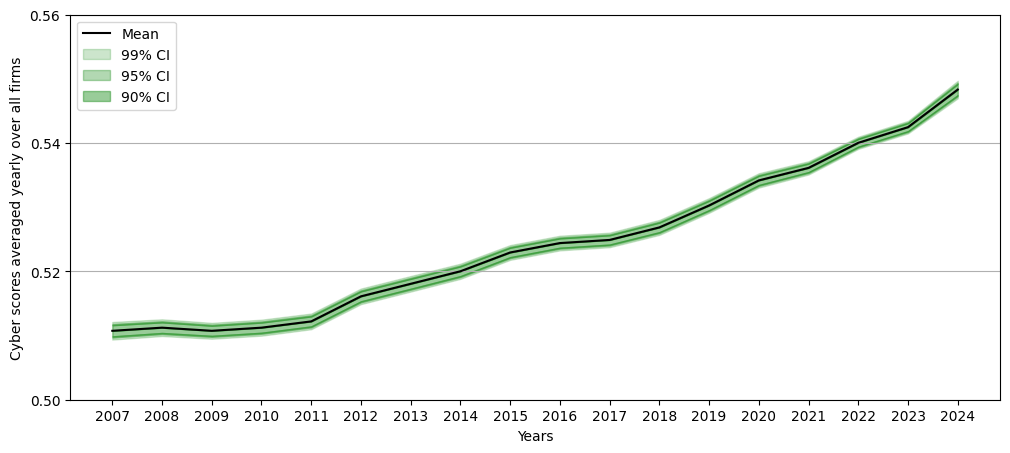

In [10]:
# Plotting
plt.figure(figsize=(12, 5)) 

# Plot mean line
plt.plot(years, [stats[3] for stats in aggregate_cyber_score_bis], label='Mean',color='black')

# Fill between percentiles with gradient colors
for i, p in enumerate([99, 95, 90]):
    lab=str(p)+"% CI"
    plt.fill_between(years, [stats[i] for stats in aggregate_cyber_score_bis], [stats[i+1] for stats in aggregate_cyber_score_bis], alpha=0.2+i*0.1,color='green',label=lab)

for i, p in enumerate([10, 5, 1]):
    plt.fill_between(years, [stats[3+i] for stats in aggregate_cyber_score_bis], [stats[3+i+1] for stats in aggregate_cyber_score_bis], alpha=0.2+(2-i)*0.1,color='green')


#plt.title("Evolution of overall cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.legend()
#plt.xlim([2007,2009])
#plt.ylim([0.505,0.515])
plt.show()

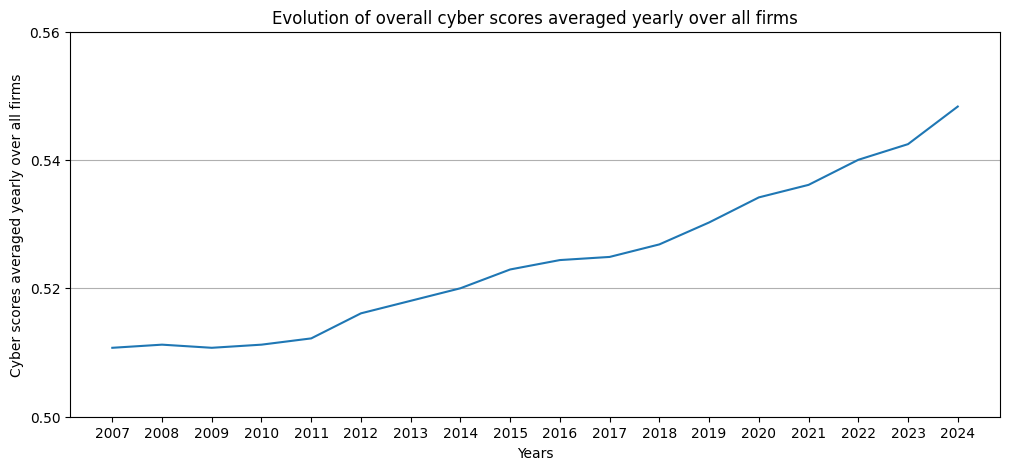

In [11]:
plt.figure(figsize=(12, 5))  # Change size here (width, height)
plt.plot(years, np.array(aggregate_cyber_score)[:,3])

plt.title("Evolution of overall cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.show()

# Cyber Sentiment Score

In [12]:
file_path = "cyber_score_dictionnary/Sentiment_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber = pickle.load(file)


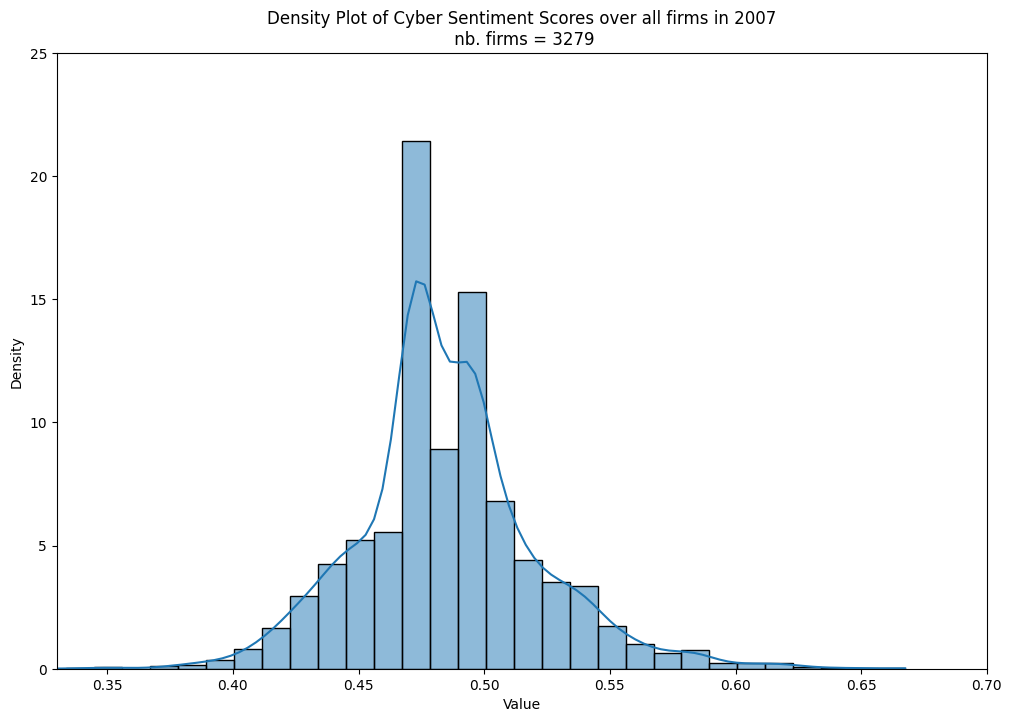

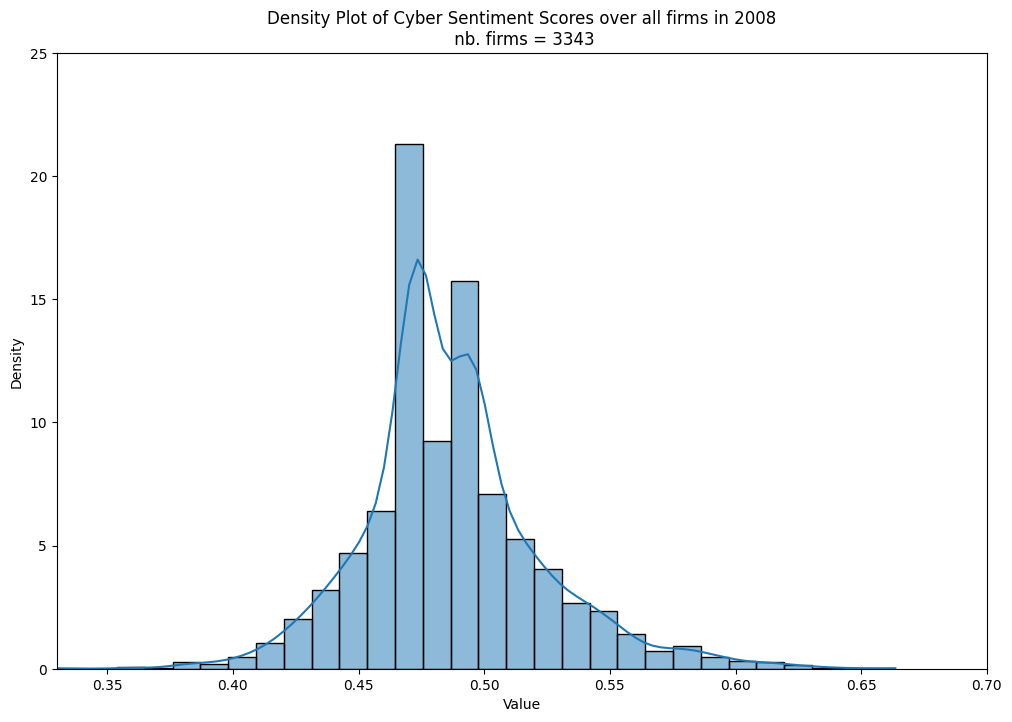

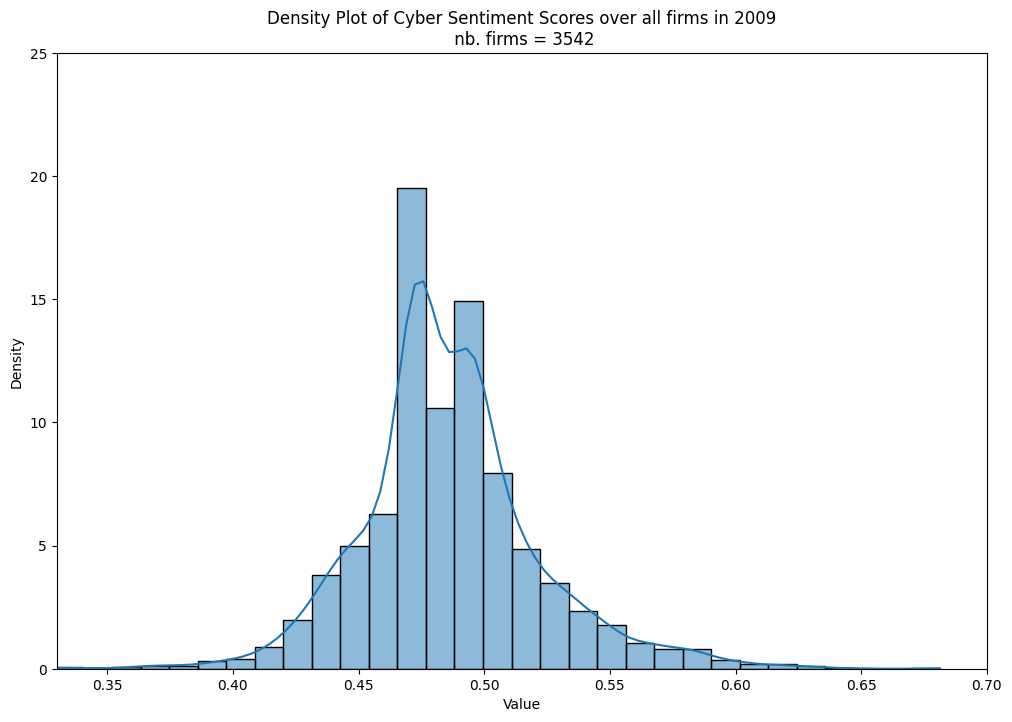

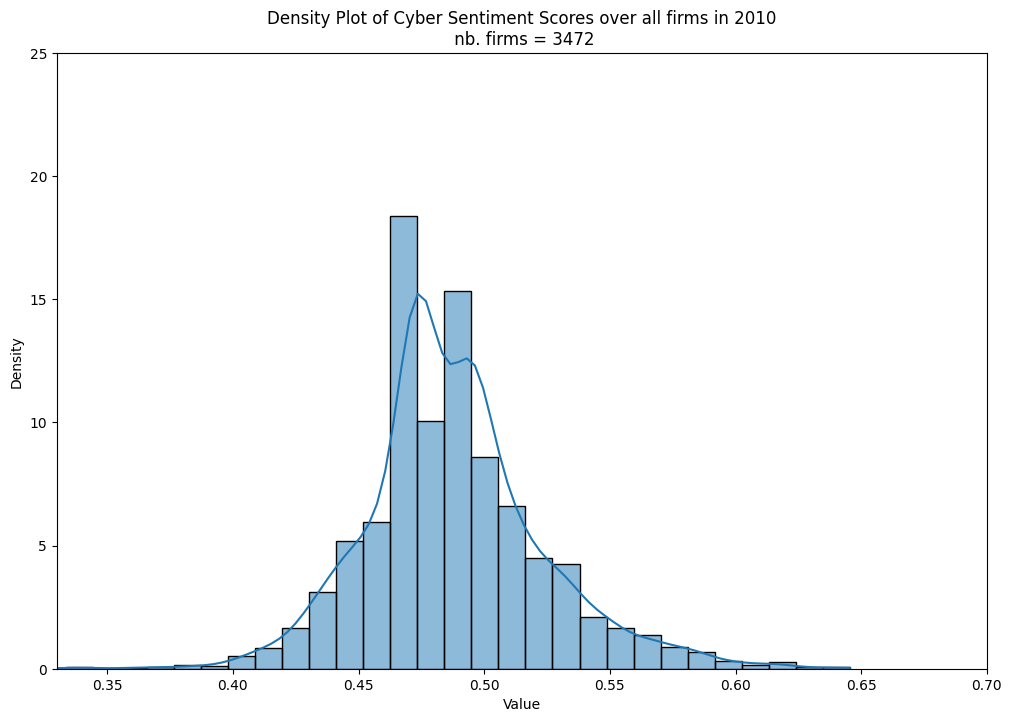

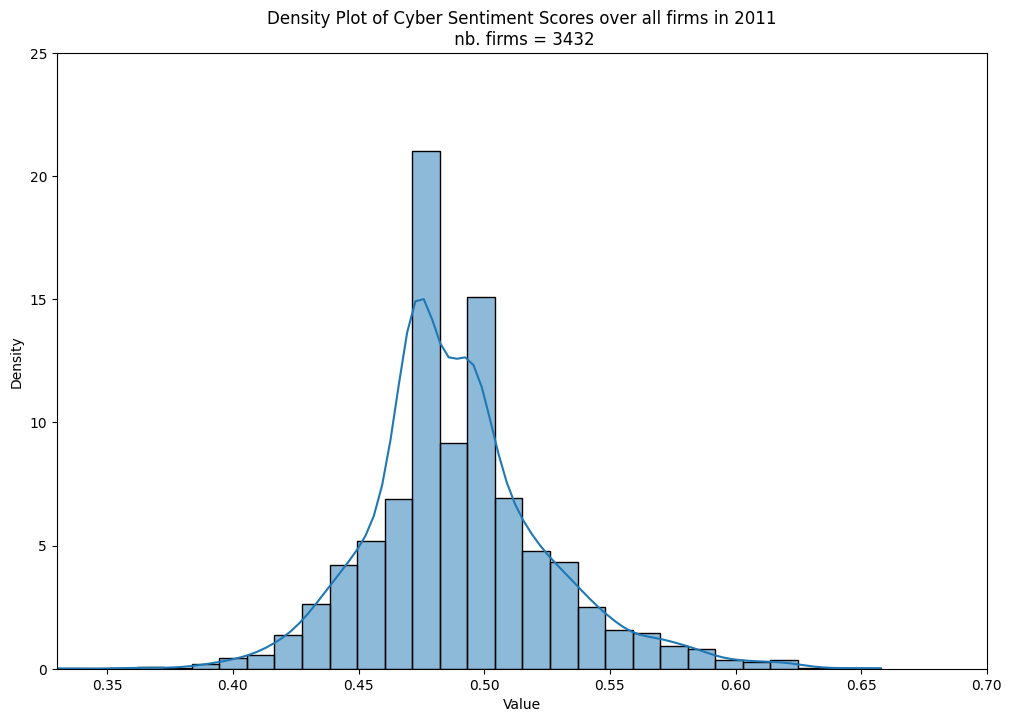

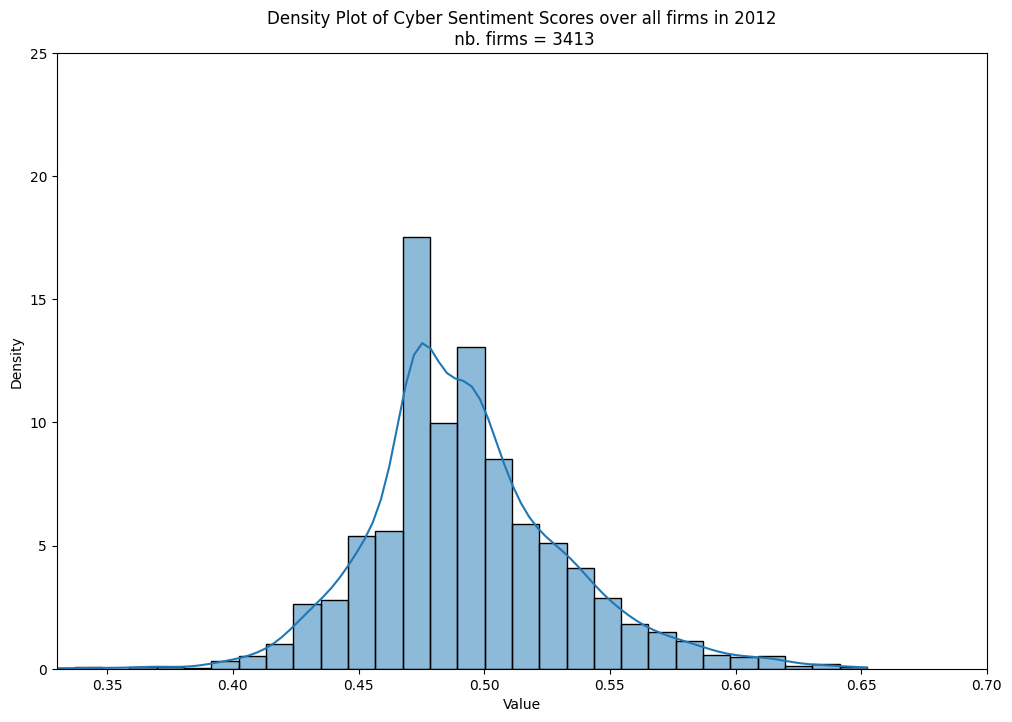

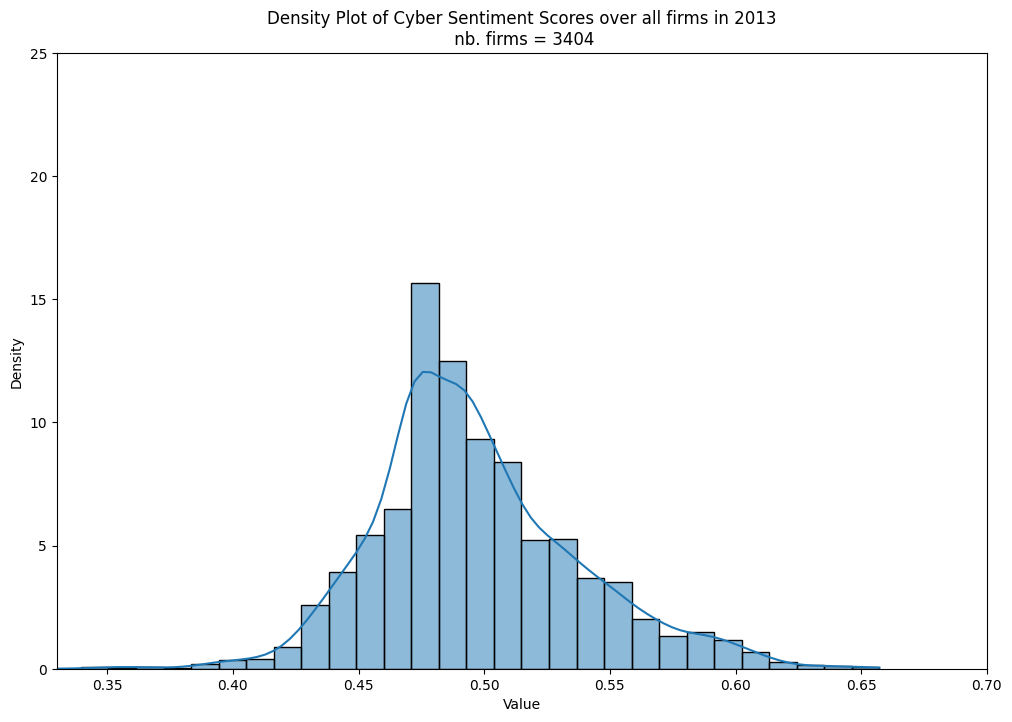

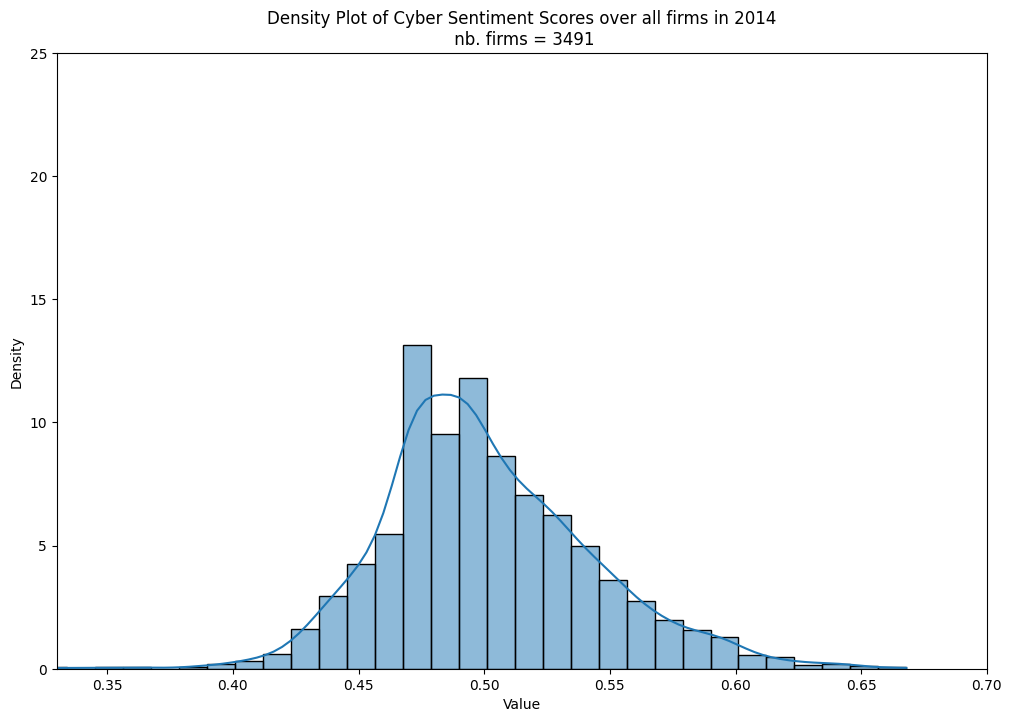

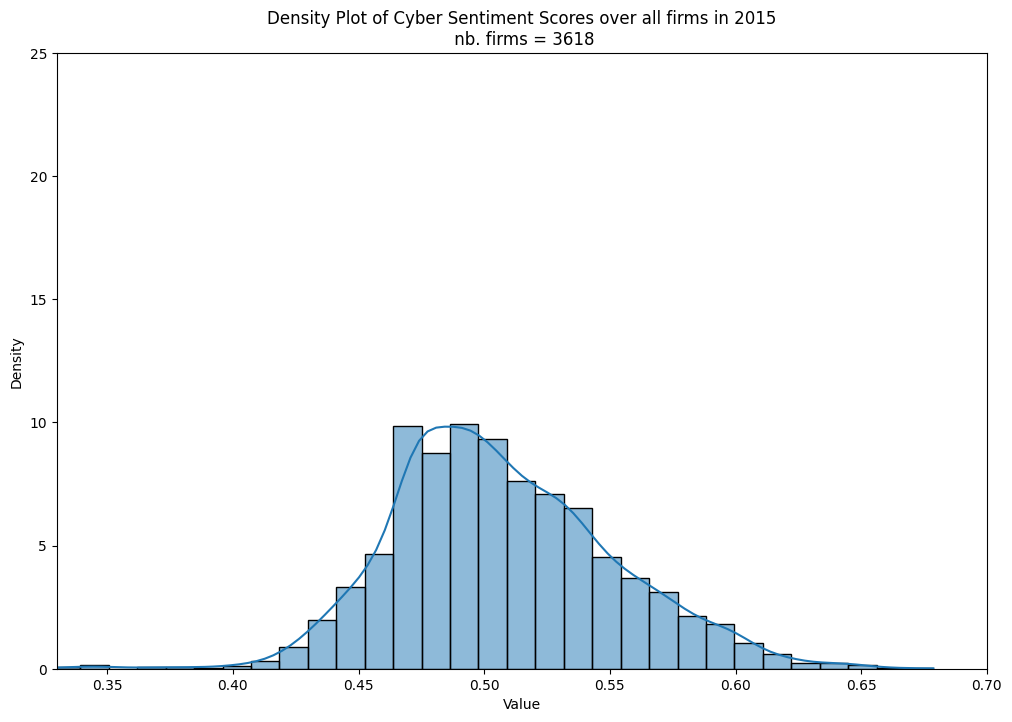

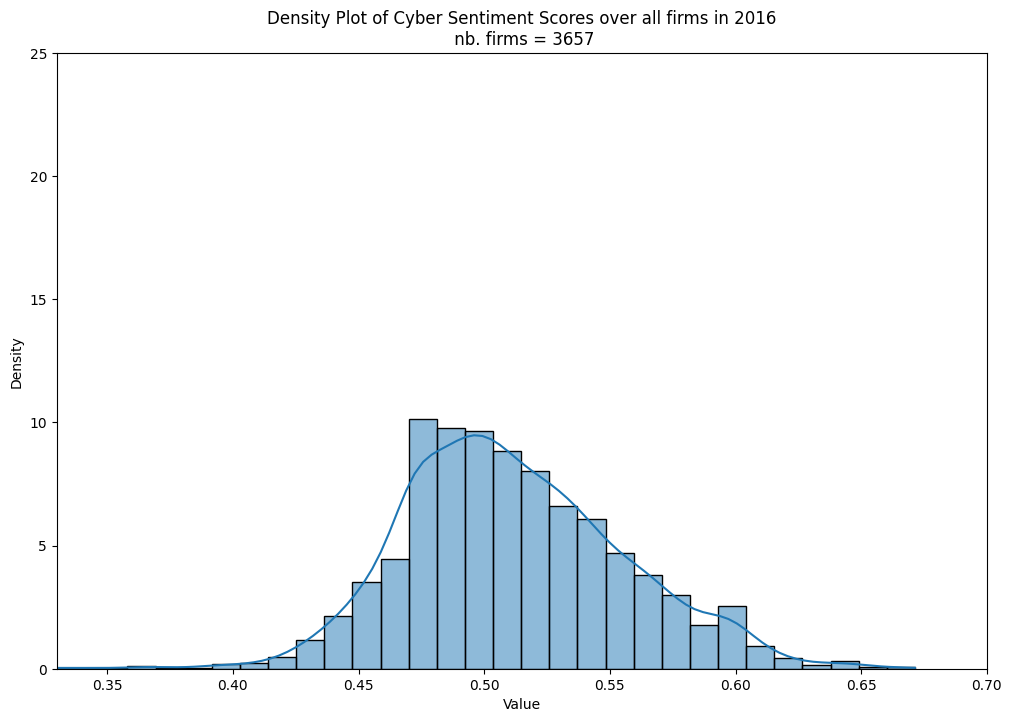

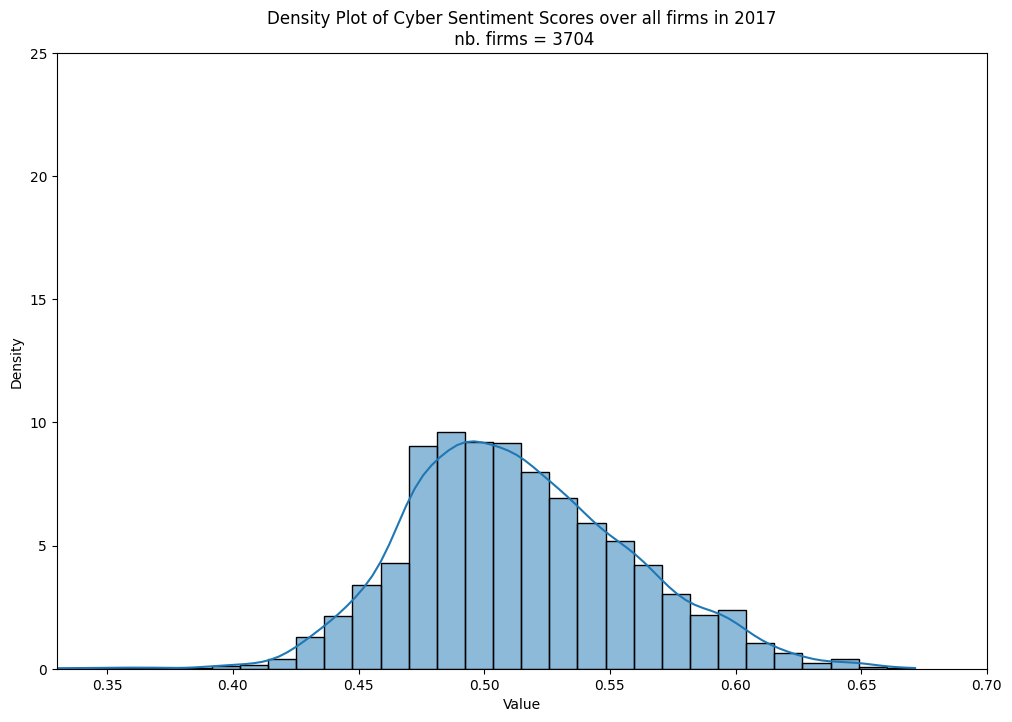

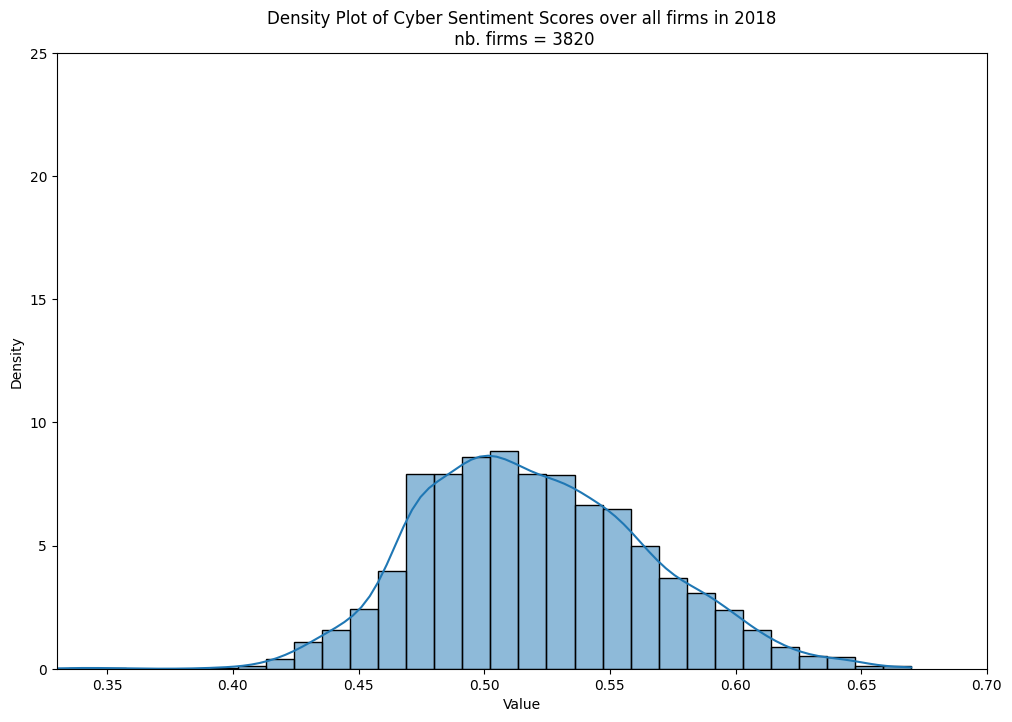

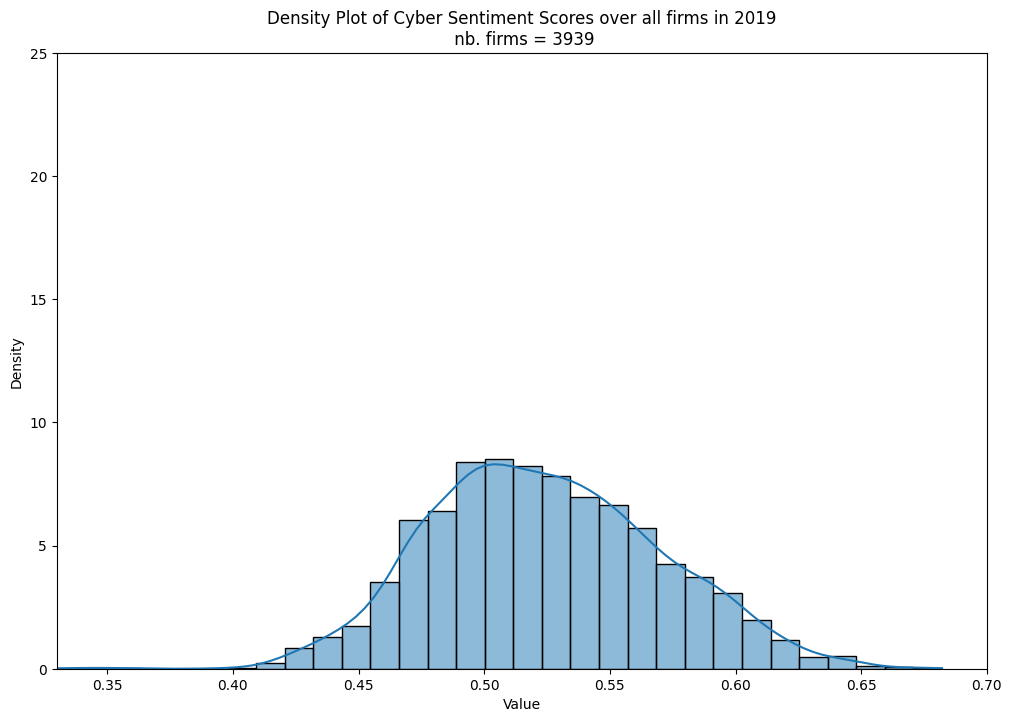

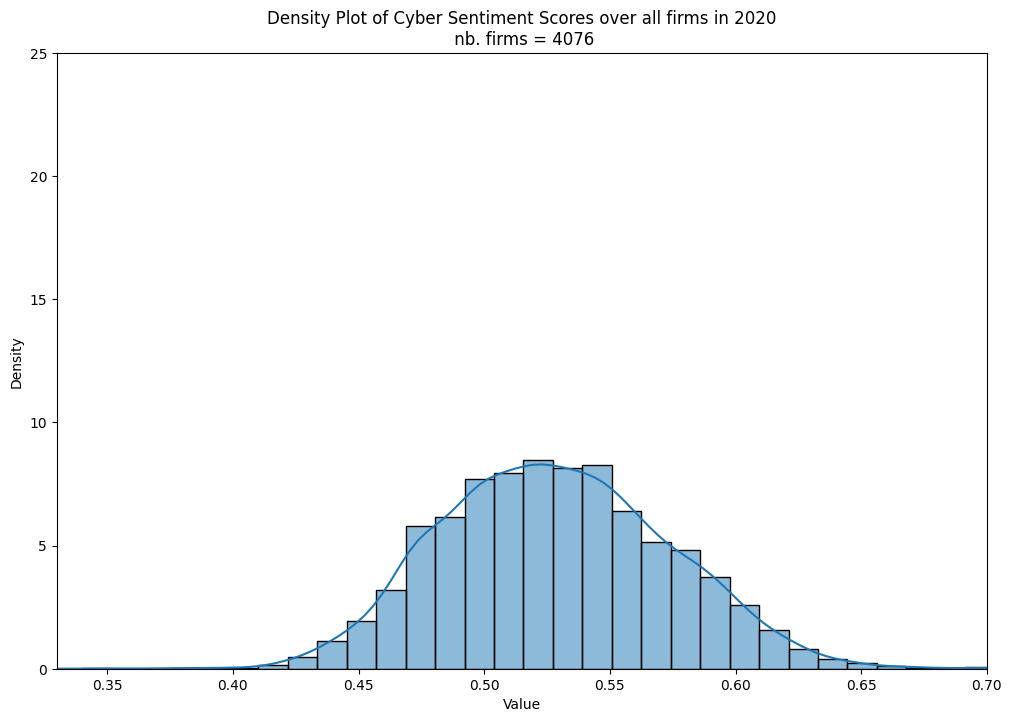

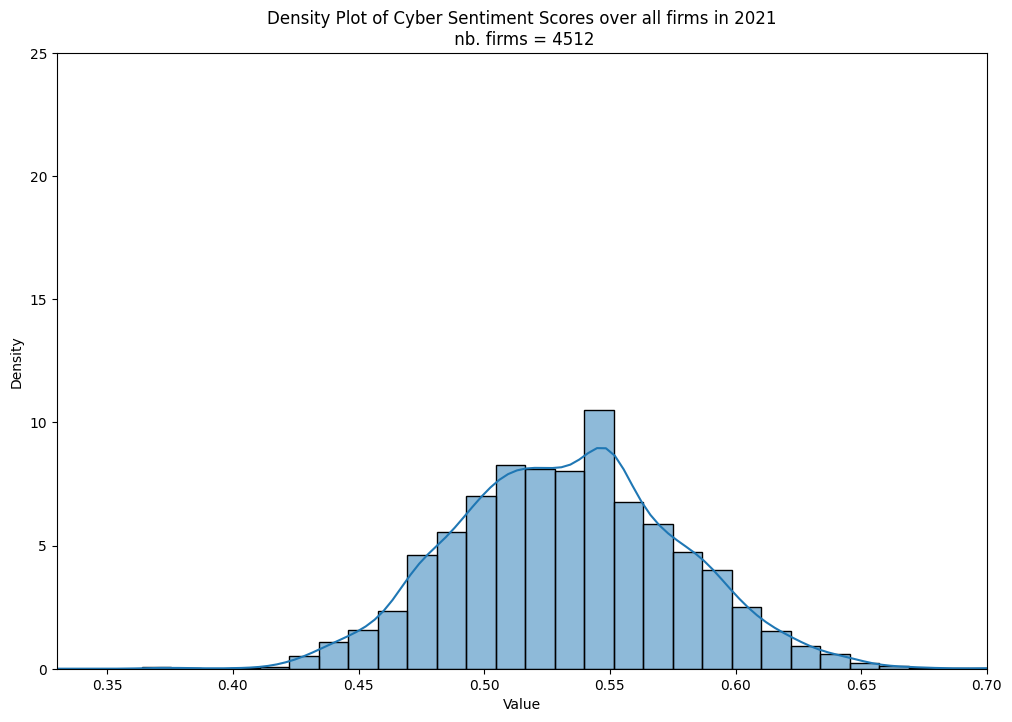

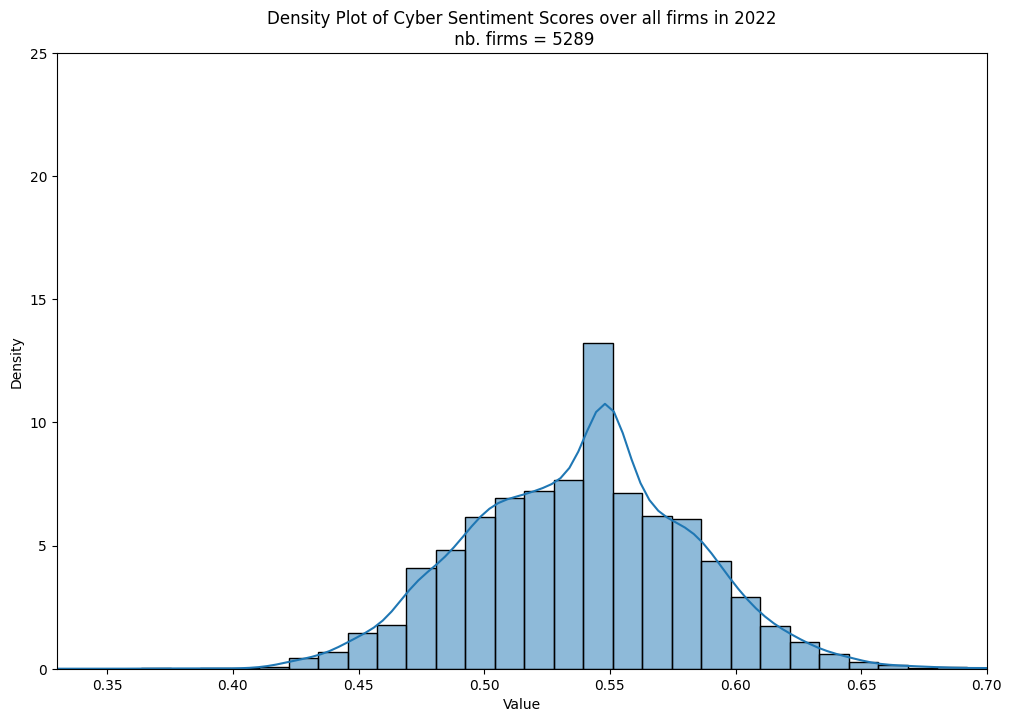

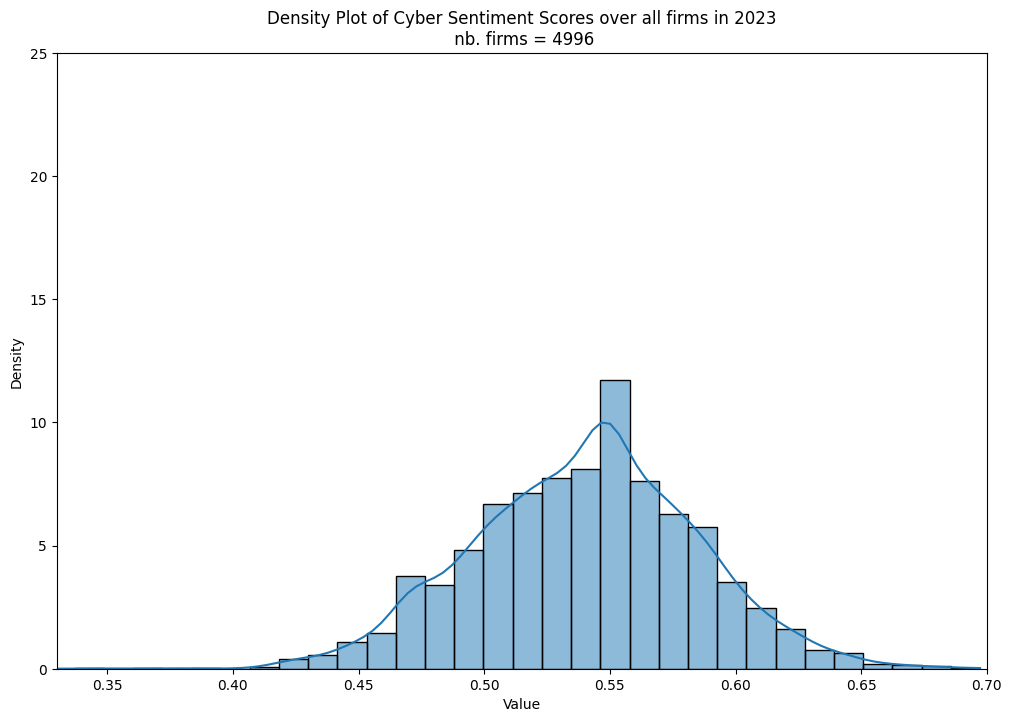

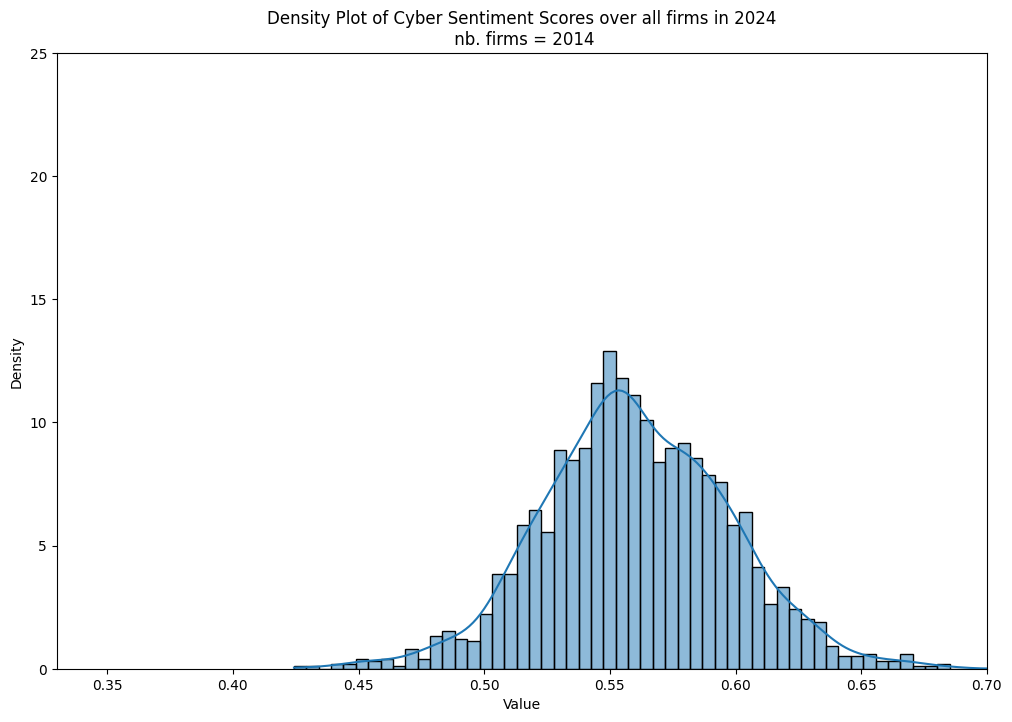

In [13]:
years = np.arange(2007, 2025)
aggregate_cyber_score = []
aggregate_cyber_score_bis=[]
for year in years:
    sns.histplot(histo_cyber[str(year)], bins=60, kde=True, edgecolor='black', stat='density')
    plt.title('Density Plot of Cyber Sentiment Scores over all firms in ' + str(year) + "\n nb. firms = " + str(histo_cyber[str(year)].shape[0]))
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim([0.33, 0.7])
    plt.ylim([0,25])

    # Save the plot
    plot_path = "cyber_score_dictionnary/sentiment_cyber_score_density_" + str(year) + ".png"
    plt.savefig(plot_path)
    
    # Show the plot (optional)
    plt.show()

    aggregate_cyber_score.append(percentile_stats(histo_cyber[str(year)]))
    aggregate_cyber_score_bis.append(CI_stats(histo_cyber[str(year)]))

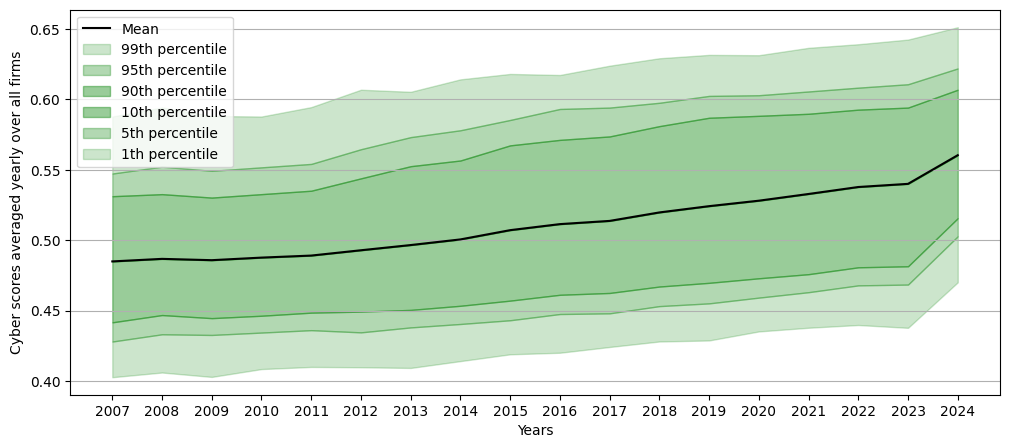

In [14]:
# Plotting
plt.figure(figsize=(12, 5)) 

# Plot mean line
plt.plot(years, [stats[3] for stats in aggregate_cyber_score], label='Mean',color='black')

# Fill between percentiles with gradient colors
for i, p in enumerate([99, 95, 90]):
    lab=str(p)+"th percentile"
    plt.fill_between(years, [stats[i] for stats in aggregate_cyber_score], [stats[i+1] for stats in aggregate_cyber_score], alpha=0.2+i*0.1,color='green',label=lab)

for i, p in enumerate([10, 5, 1]):
    lab=str(p)+"th percentile"
    plt.fill_between(years, [stats[3+i] for stats in aggregate_cyber_score], [stats[3+i+1] for stats in aggregate_cyber_score], alpha=0.2+(2-i)*0.1,color='green',label=lab)


#plt.title("Evolution of cyber sentiment scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
#plt.yticks([0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.legend(loc='upper left')
plt.show()

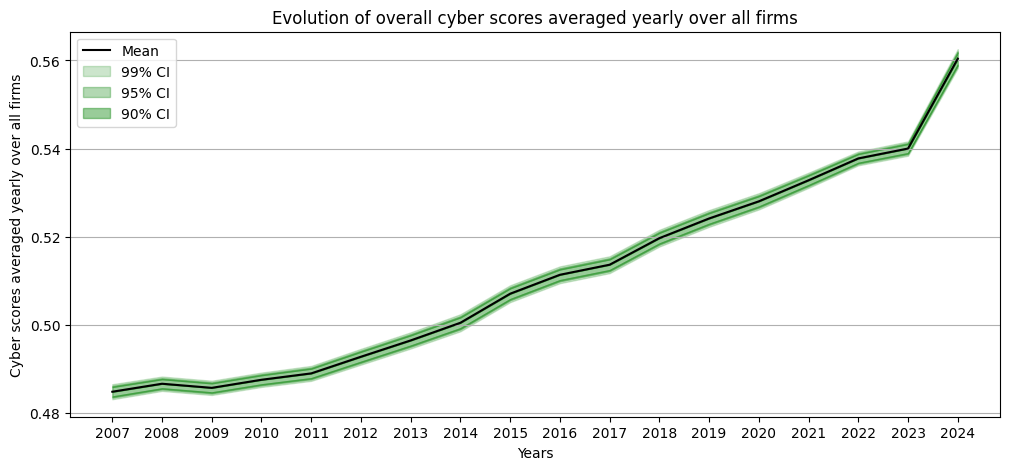

In [15]:
# Plotting
plt.figure(figsize=(12, 5)) 

# Plot mean line
plt.plot(years, [stats[3] for stats in aggregate_cyber_score_bis], label='Mean',color='black')

# Fill between percentiles with gradient colors
for i, p in enumerate([99, 95, 90]):
    lab=str(p)+"% CI"
    plt.fill_between(years, [stats[i] for stats in aggregate_cyber_score_bis], [stats[i+1] for stats in aggregate_cyber_score_bis], alpha=0.2+i*0.1,color='green',label=lab)

for i, p in enumerate([10, 5, 1]):
    plt.fill_between(years, [stats[3+i] for stats in aggregate_cyber_score_bis], [stats[3+i+1] for stats in aggregate_cyber_score_bis], alpha=0.2+(2-i)*0.1,color='green')


plt.title("Evolution of overall cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.48,0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.legend()
#plt.xlim([2007,2009])
#plt.ylim([0.505,0.515])
plt.show()

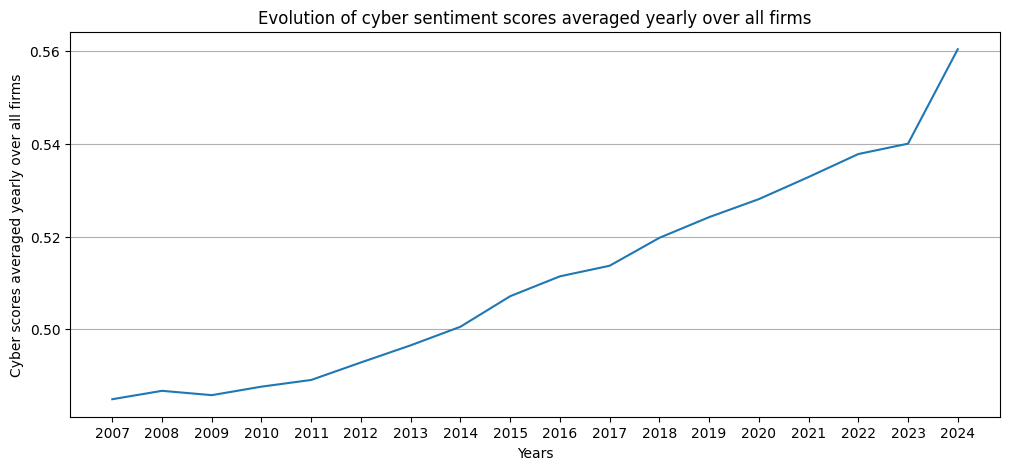

In [16]:
plt.figure(figsize=(12, 5))  # Change size here (width, height)
plt.plot(years, np.array(aggregate_cyber_score)[:,3])

plt.title("Evolution of cyber sentiment scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.show()

In [17]:
#Testing for and Dating Common Breaks in Multivariate Time Series 1998
#https://cran.r-project.org/web/packages/multibreakeR/multibreakeR.pdf
#To test jumps in time series

# Disentangled on 14 tactics cyber scores

In [28]:
file_path = "cyber_score_dictionnary/14_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber = pickle.load(file)


In [29]:
file_path = "cyber_score_dictionnary/Overall_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber_overall = pickle.load(file)

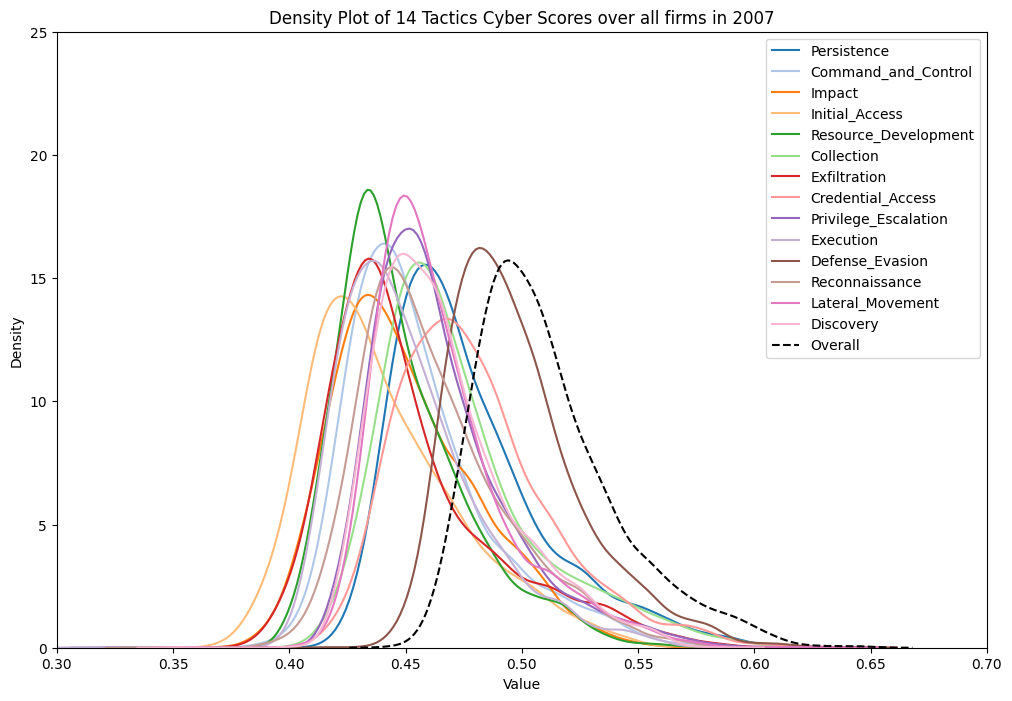

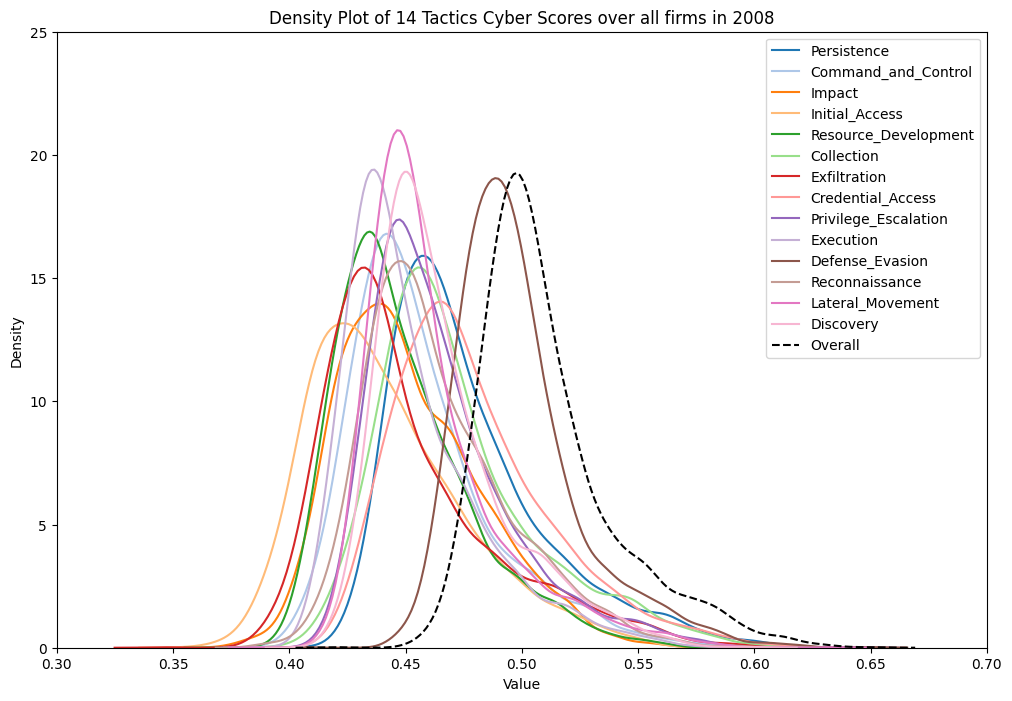

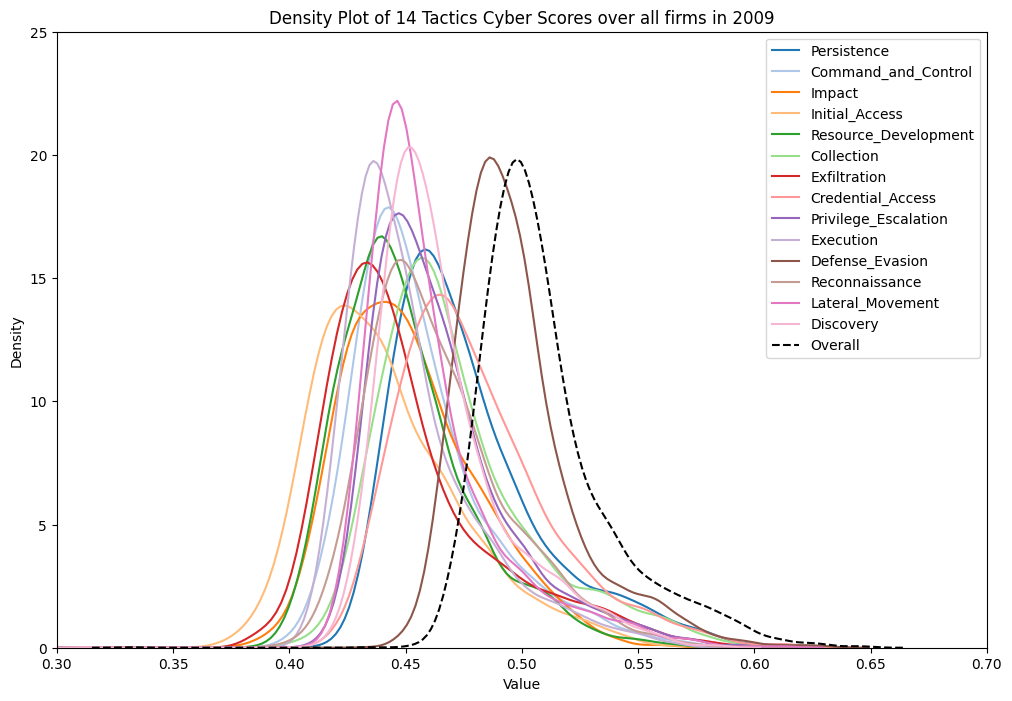

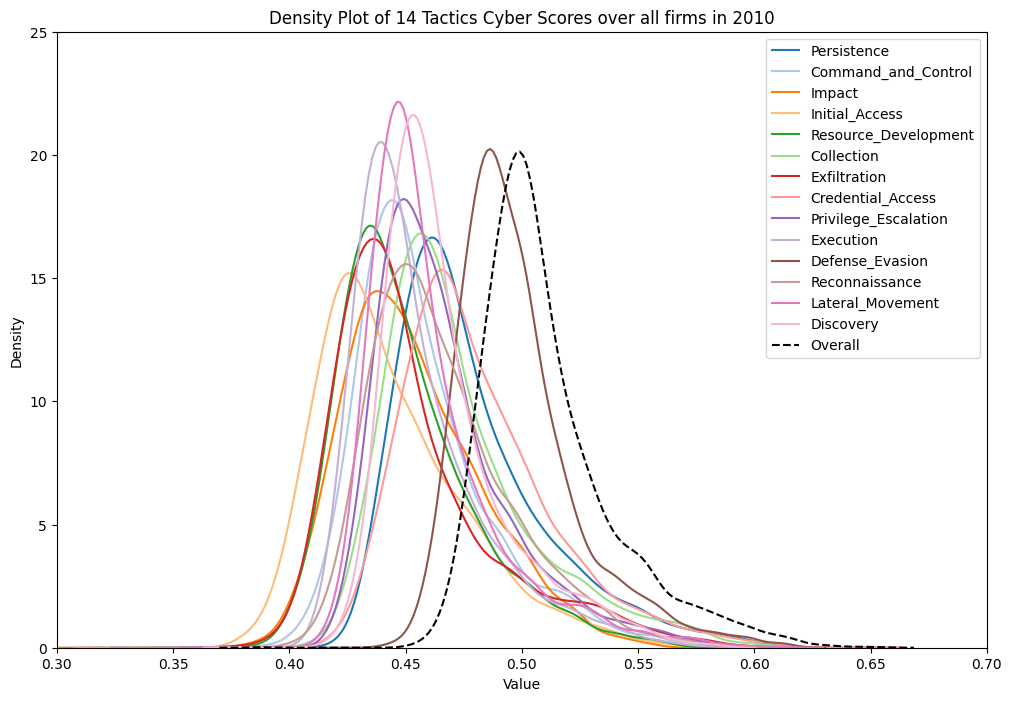

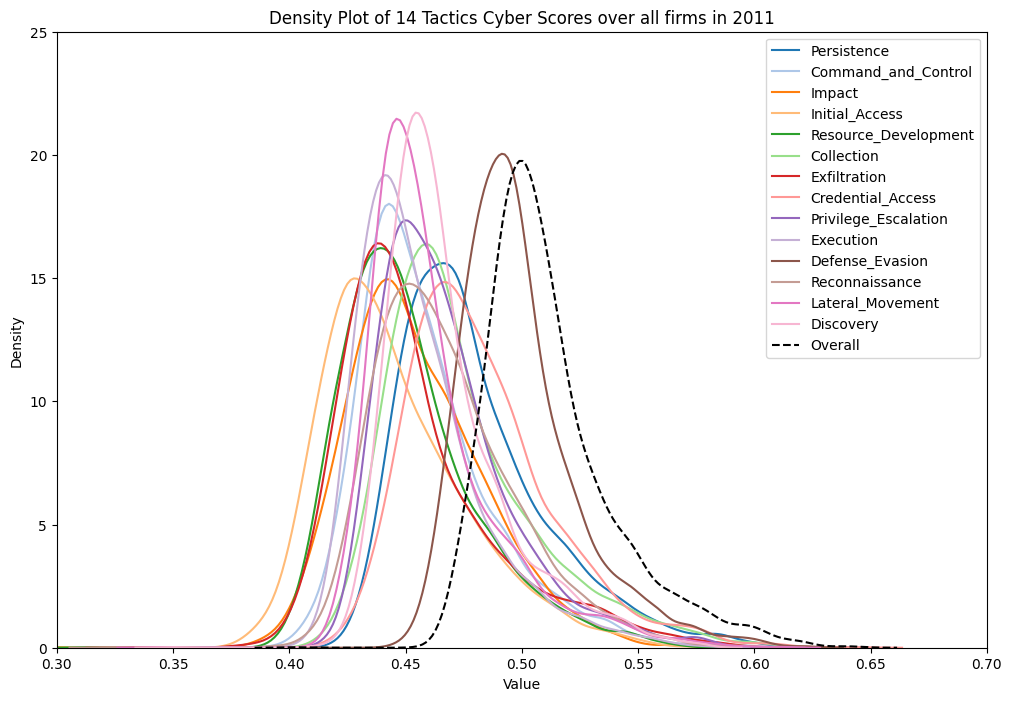

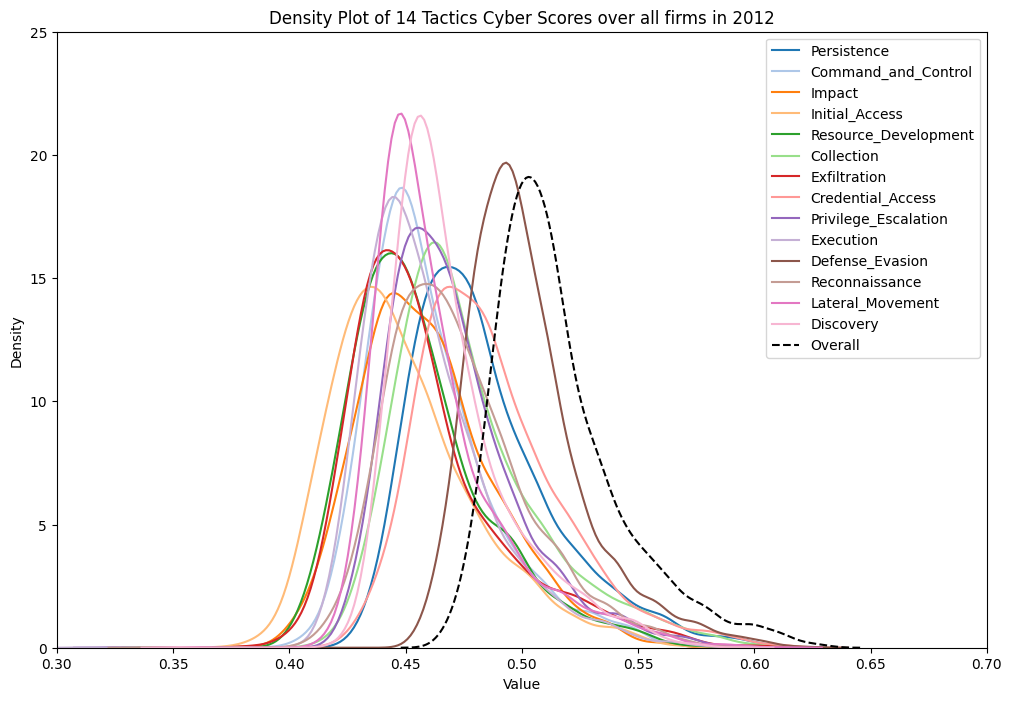

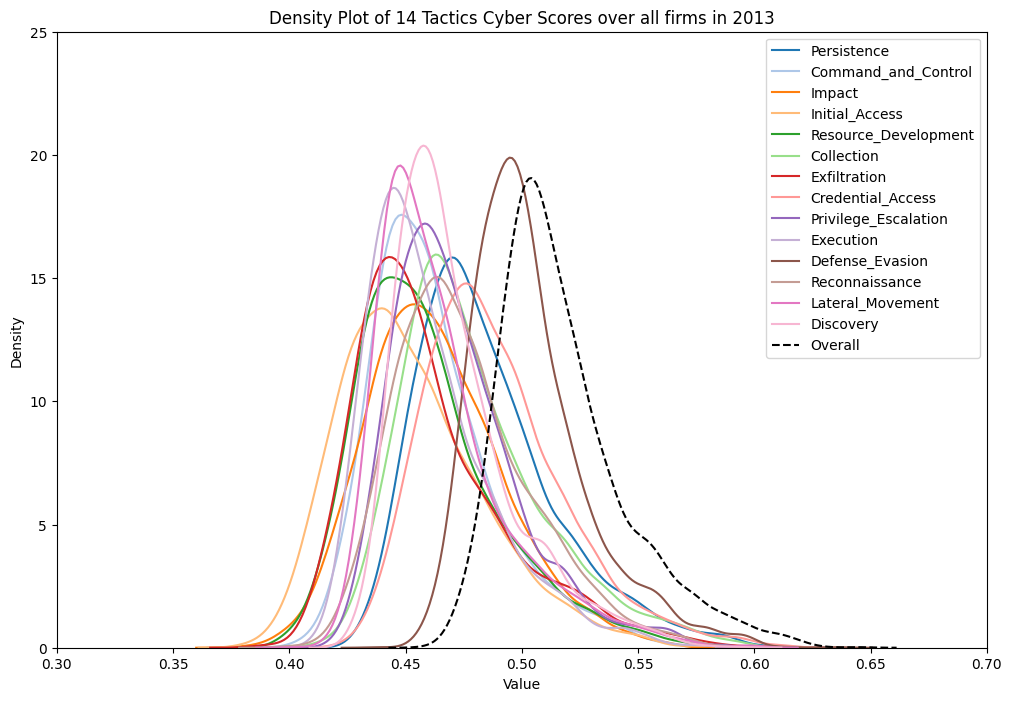

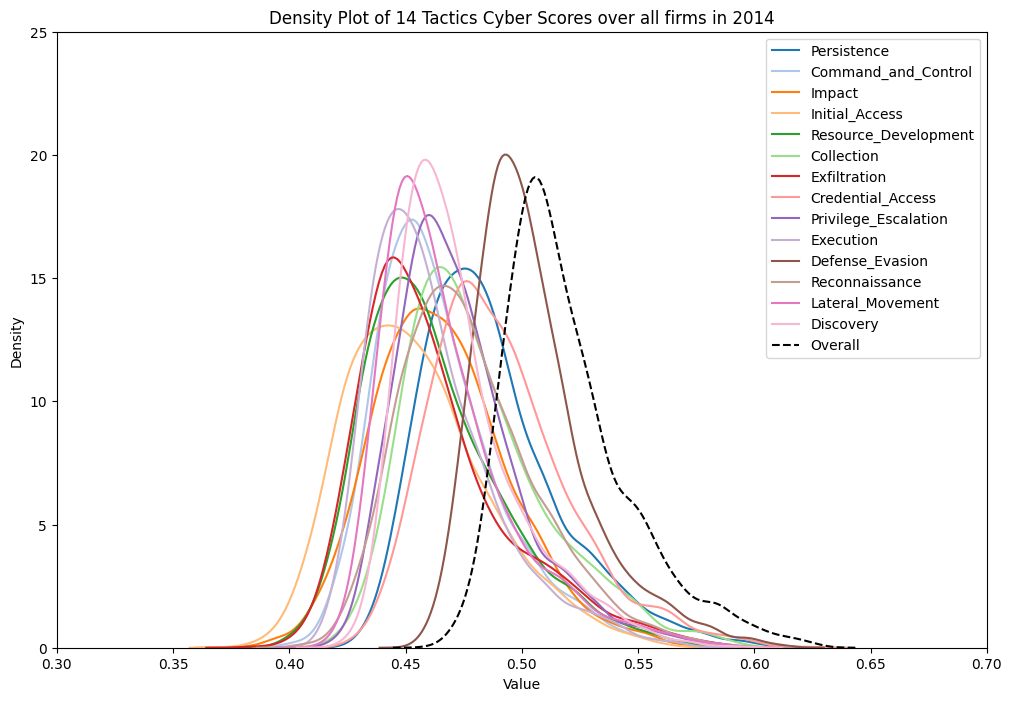

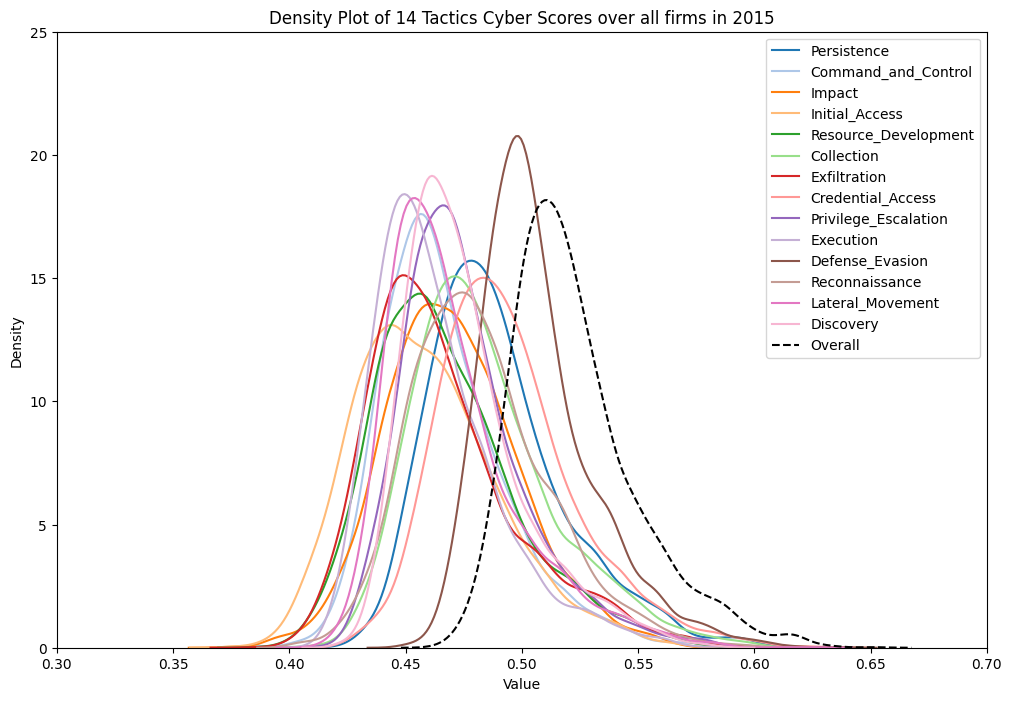

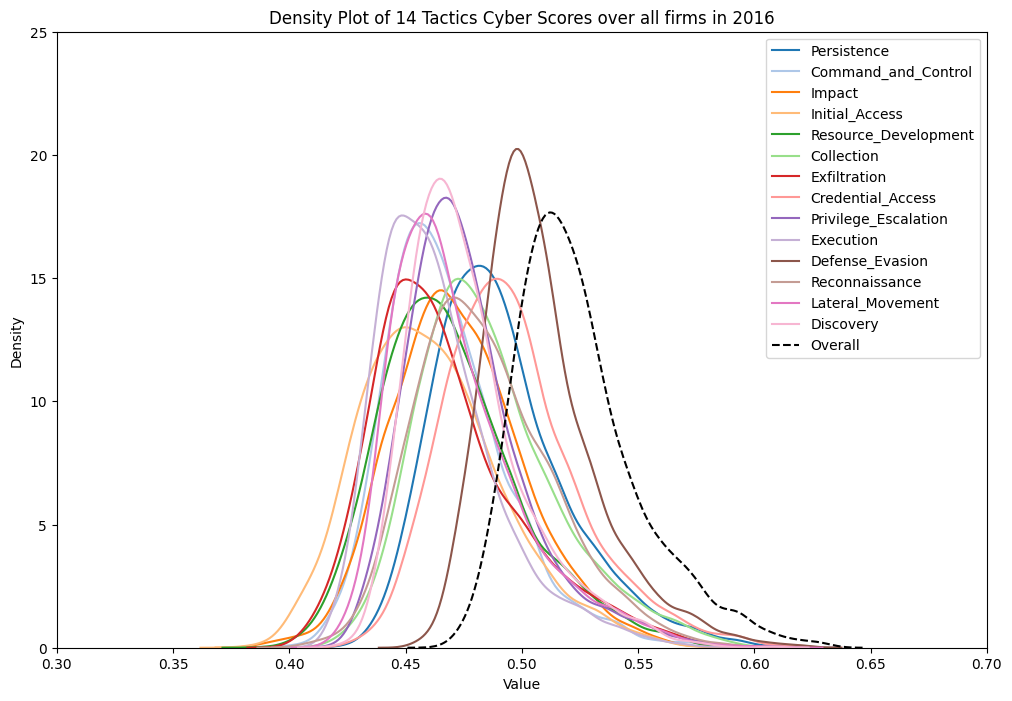

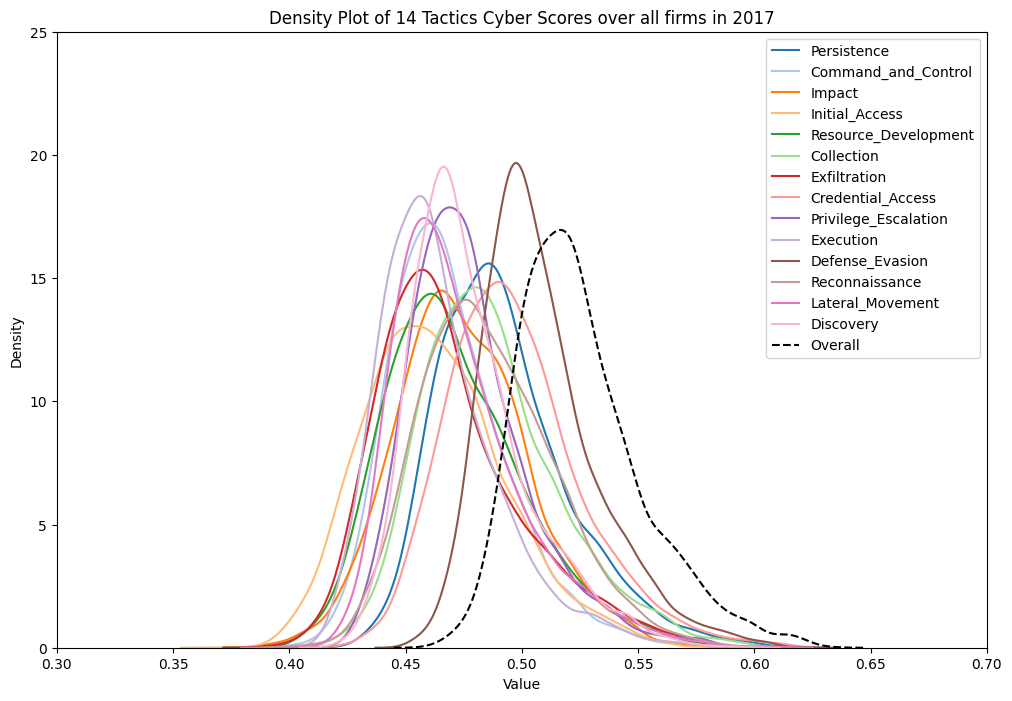

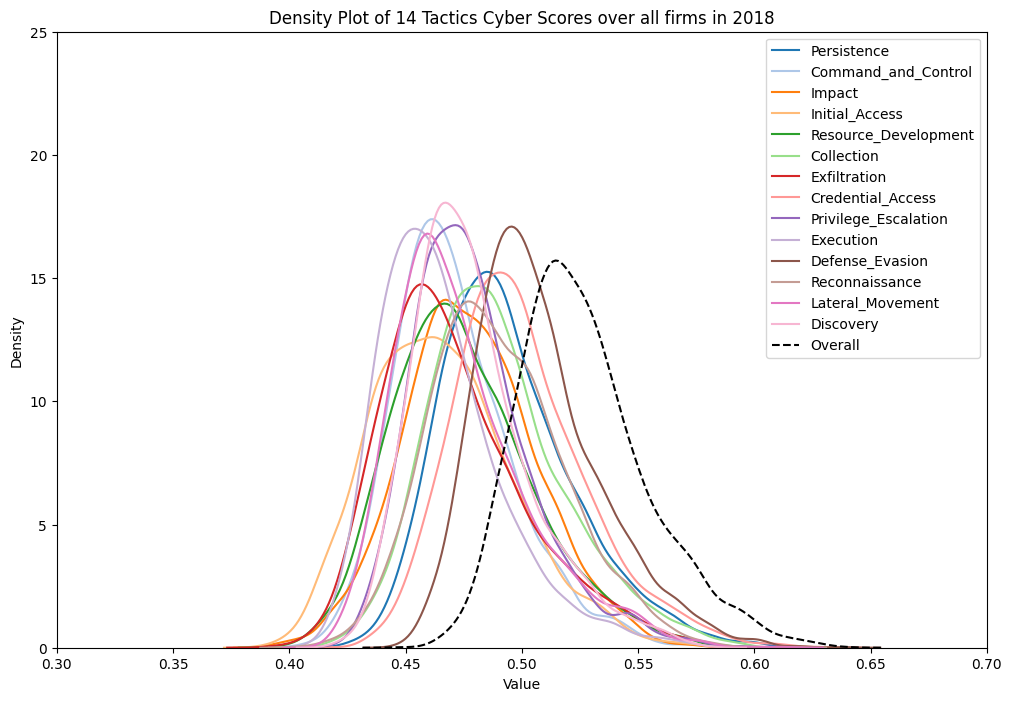

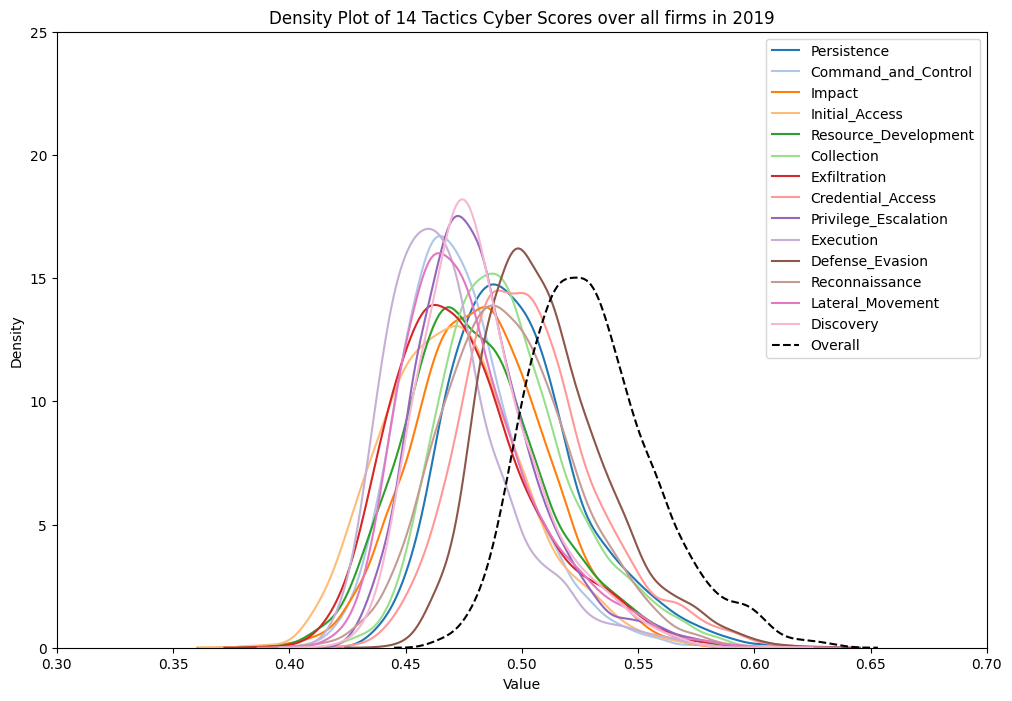

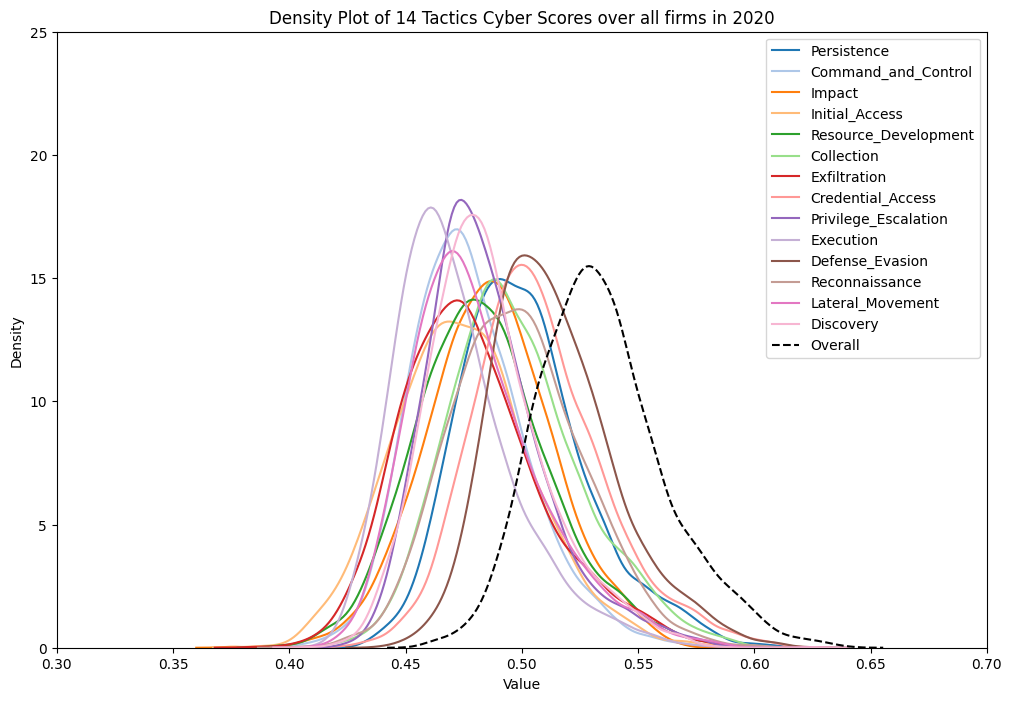

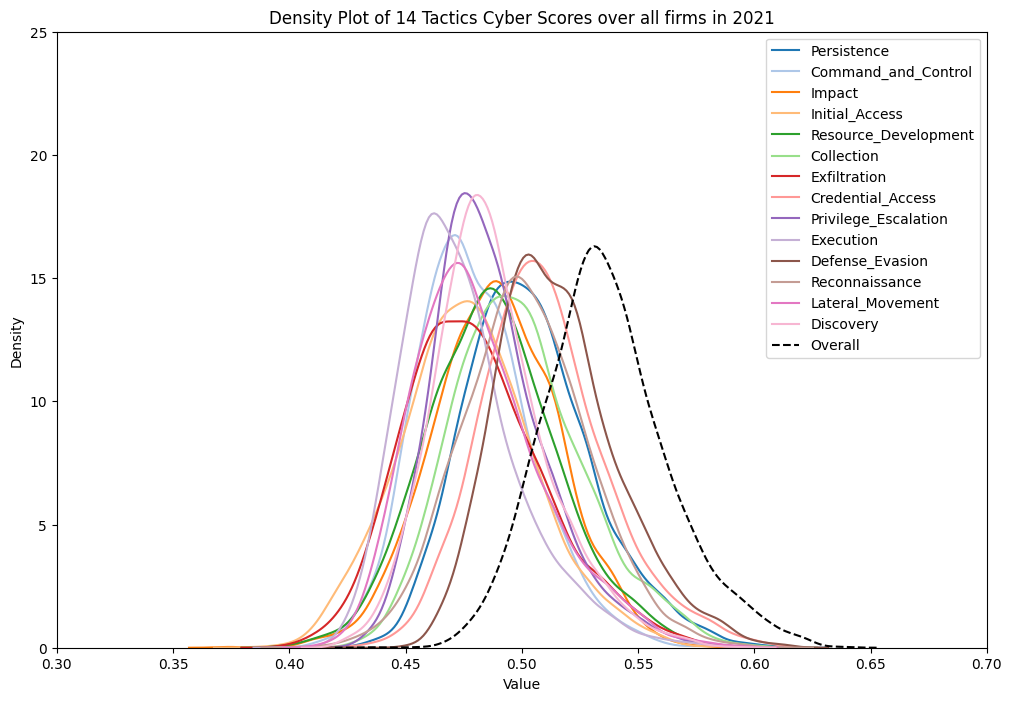

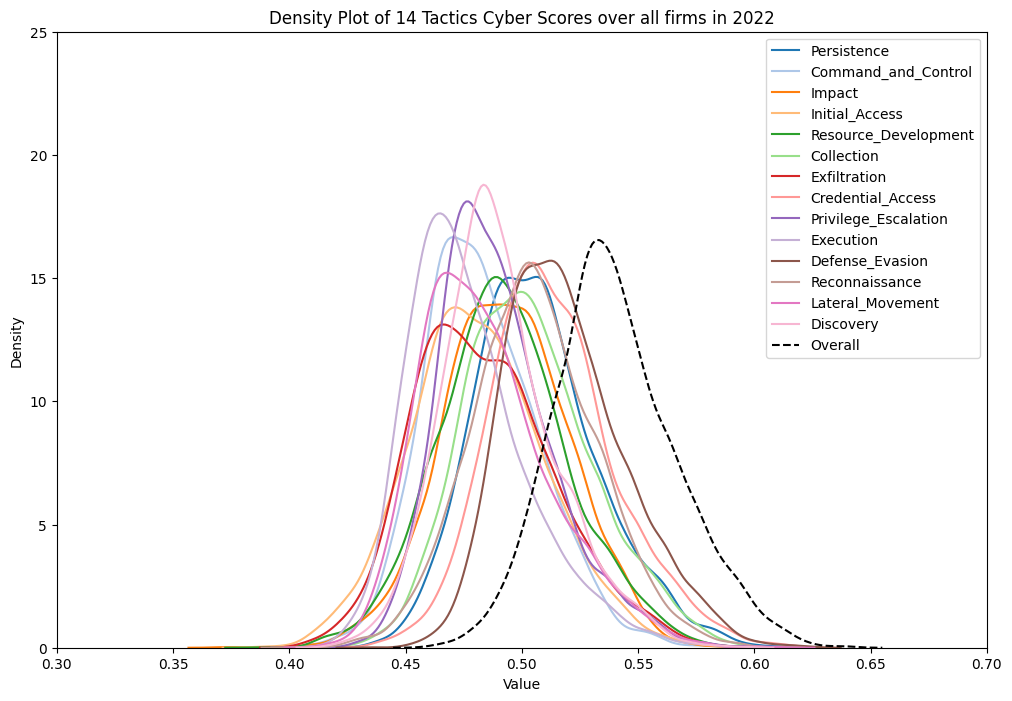

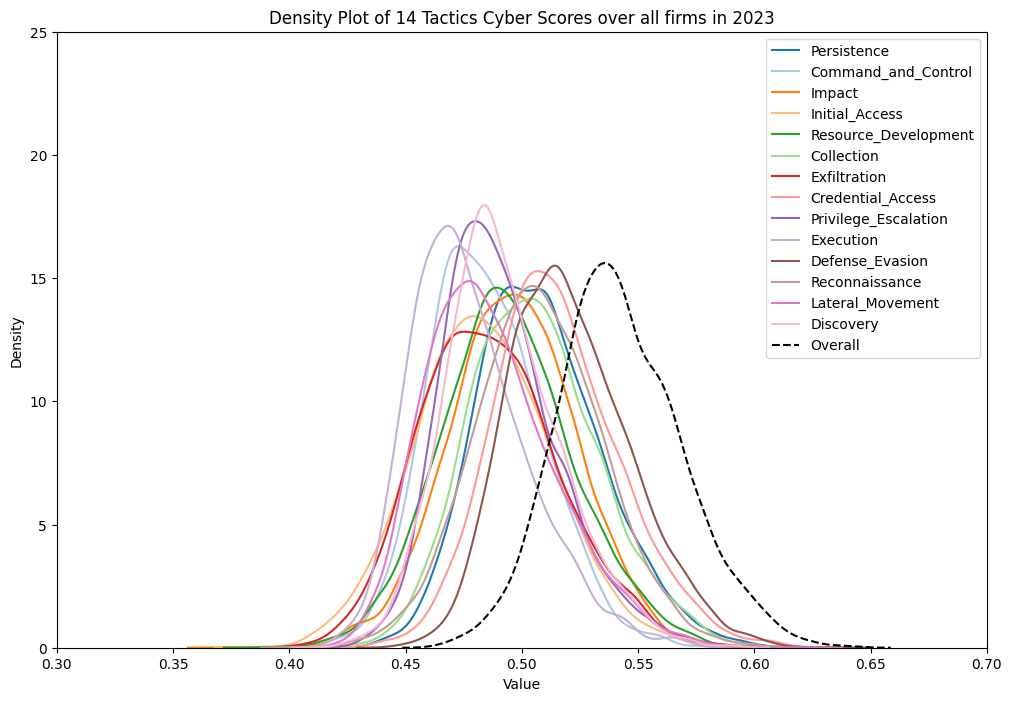

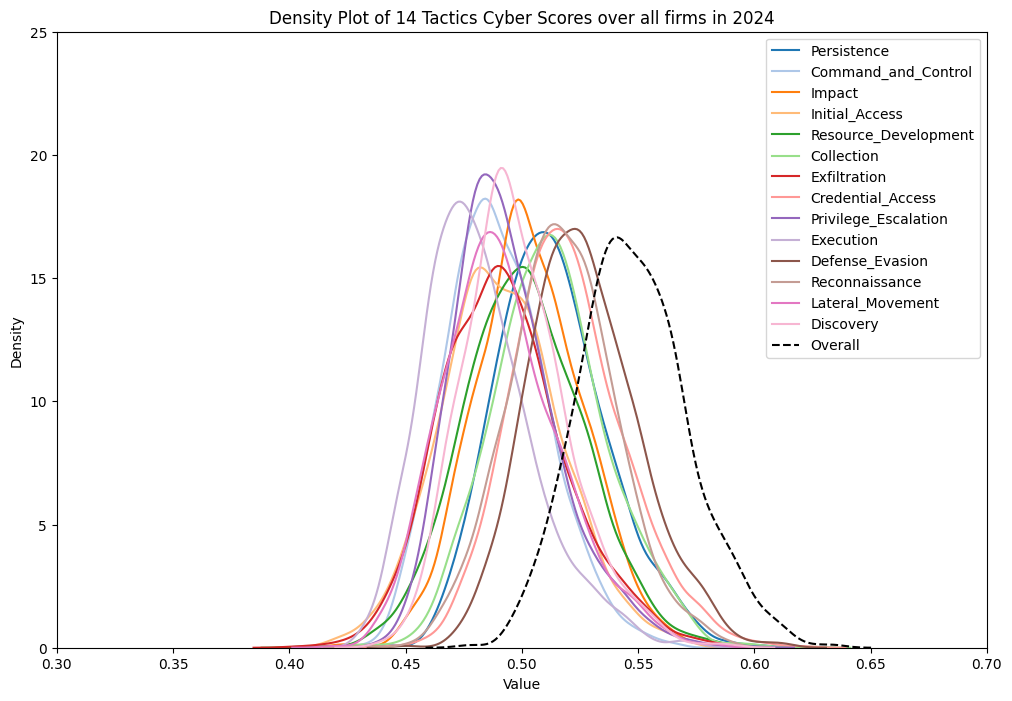

In [30]:
# Define a custom color palette for tactics
palette = sns.color_palette("tab20", n_colors=14)

years = np.arange(2007, 2025)
aggregate_cyber_score = []
aggregate_cyber_score_overall = []
for year in years:
    list_14_scores=[]
    
    for i, (key, color) in enumerate(zip(list(histo_cyber[str(year)].keys()), palette)):
        sns.kdeplot(histo_cyber[str(year)][key], common_norm=True, label=key, color=color)

        list_14_scores.append(np.mean(histo_cyber[str(year)][key]))

    sns.kdeplot(histo_cyber_overall[str(year)],common_norm=True, label="Overall" ,color="black",linestyle="--")
    
    plt.title('Density Plot of 14 Tactics Cyber Scores over all firms in ' + str(year) )
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim([0.3, 0.7])
    plt.ylim([0,25])
    plt.legend()

    # Save the plot
    plot_path = "cyber_score_dictionnary/14_cyber_score_density_" + str(year) + ".png"
    plt.savefig(plot_path)
    
    # Show the plot (optional)
    plt.show()

    aggregate_cyber_score.append(list_14_scores)

    aggregate_cyber_score_overall.append(np.mean(histo_cyber_overall[str(year)]))

    name_tactic=list(histo_cyber[str(year)].keys())

In [31]:
aggregate_cyber_score=np.array(aggregate_cyber_score)
aggregate_cyber_score_overall=np.array(aggregate_cyber_score_overall)

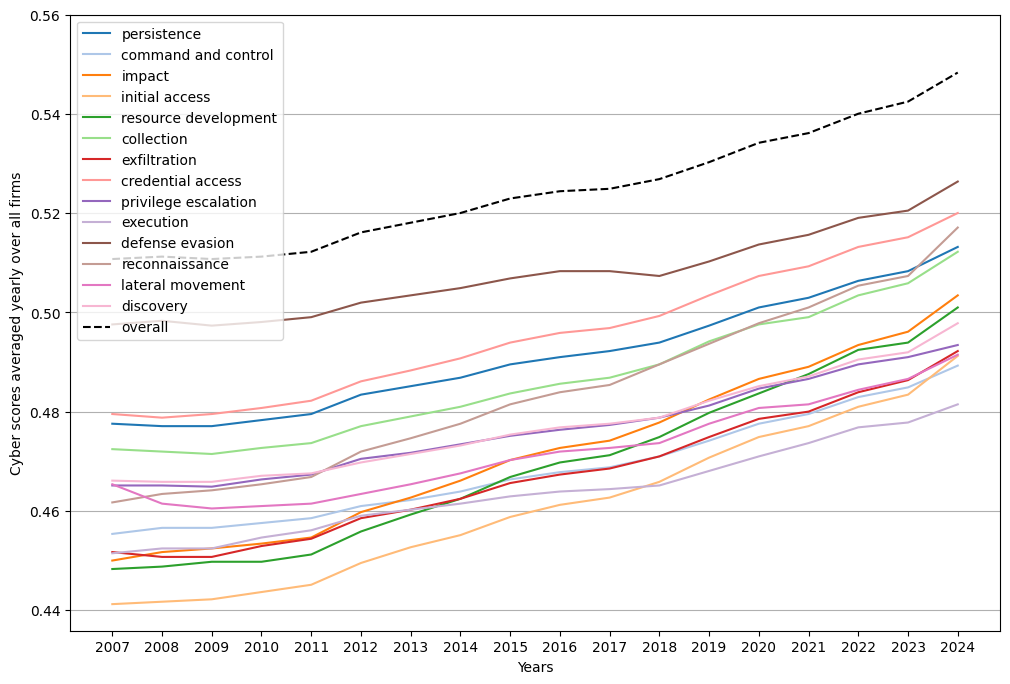

In [32]:
palette = sns.color_palette("tab20", n_colors=14)
for j,tactic in enumerate(name_tactic):
    n_tac=tactic.replace('_', ' ').lower()
    plt.plot(years,aggregate_cyber_score[:,j],label=n_tac,color=palette[j])

plt.plot(years, aggregate_cyber_score_overall, label="overall",color="black",linestyle="--")
plt.legend()
#plt.title("Evolution of 14 tactics of cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.44,0.46,0.48,0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.show()

# Disentangled on 4 super tactics cyber scores

In [33]:
file_path = "cyber_score_dictionnary/super_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber = pickle.load(file)


In [34]:
file_path = "cyber_score_dictionnary/Overall_cyber_score.pkl"

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the dictionary from the file
    histo_cyber_overall = pickle.load(file)

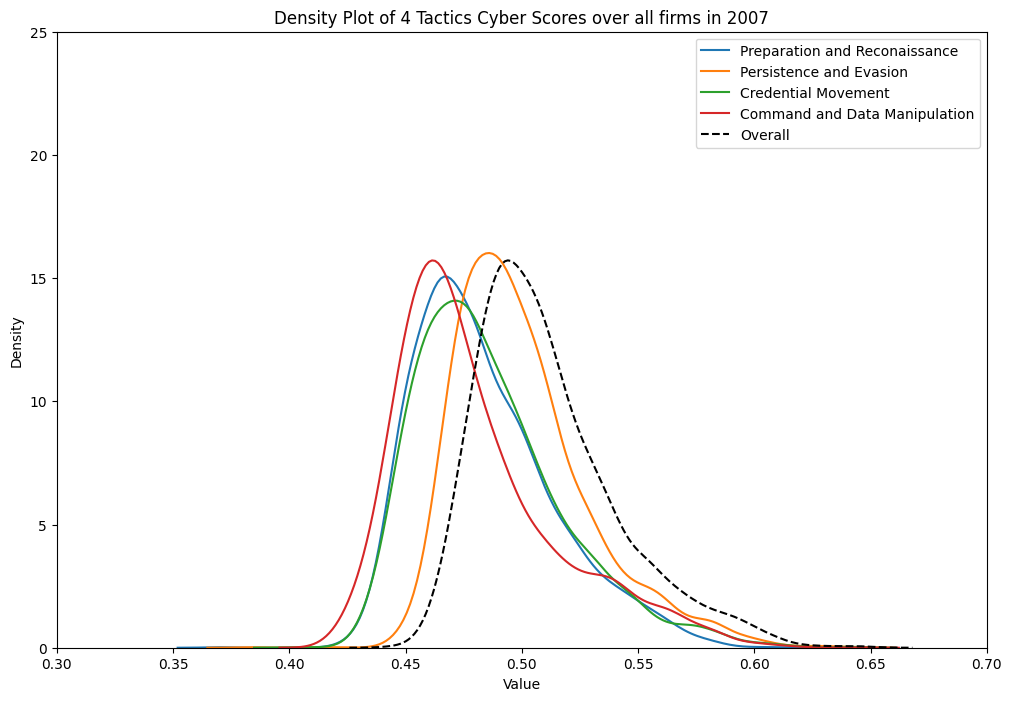

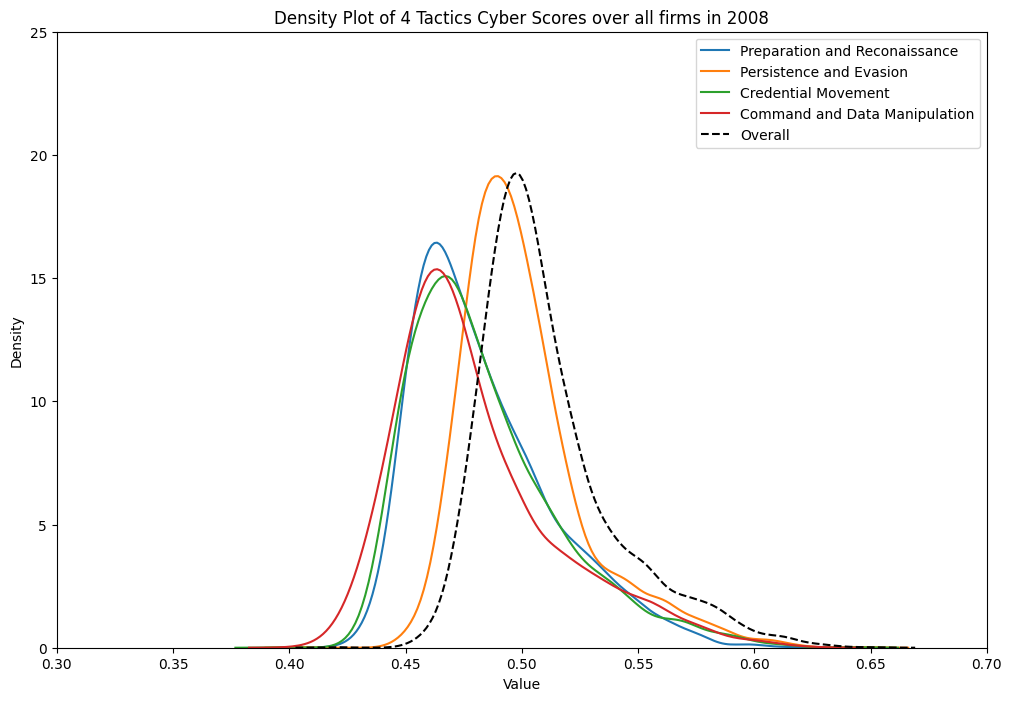

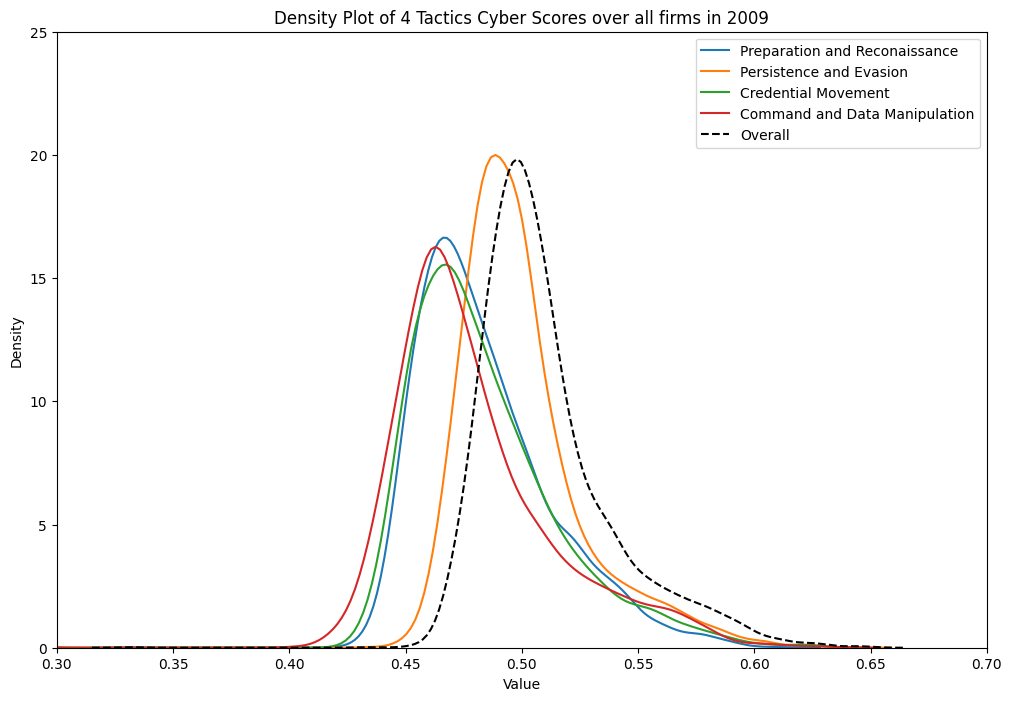

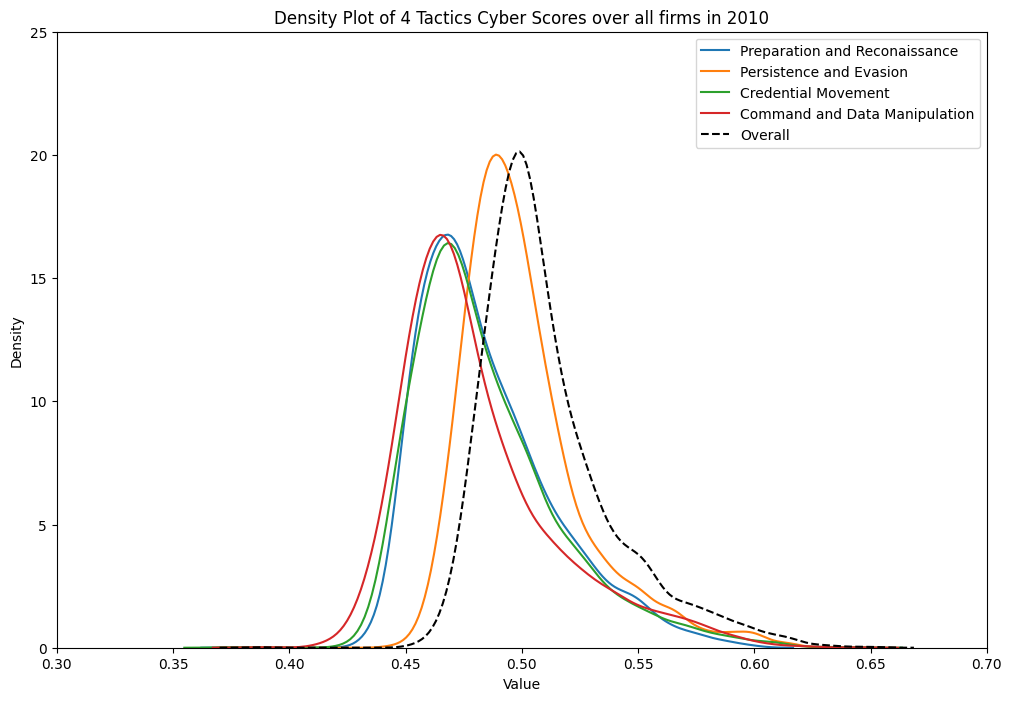

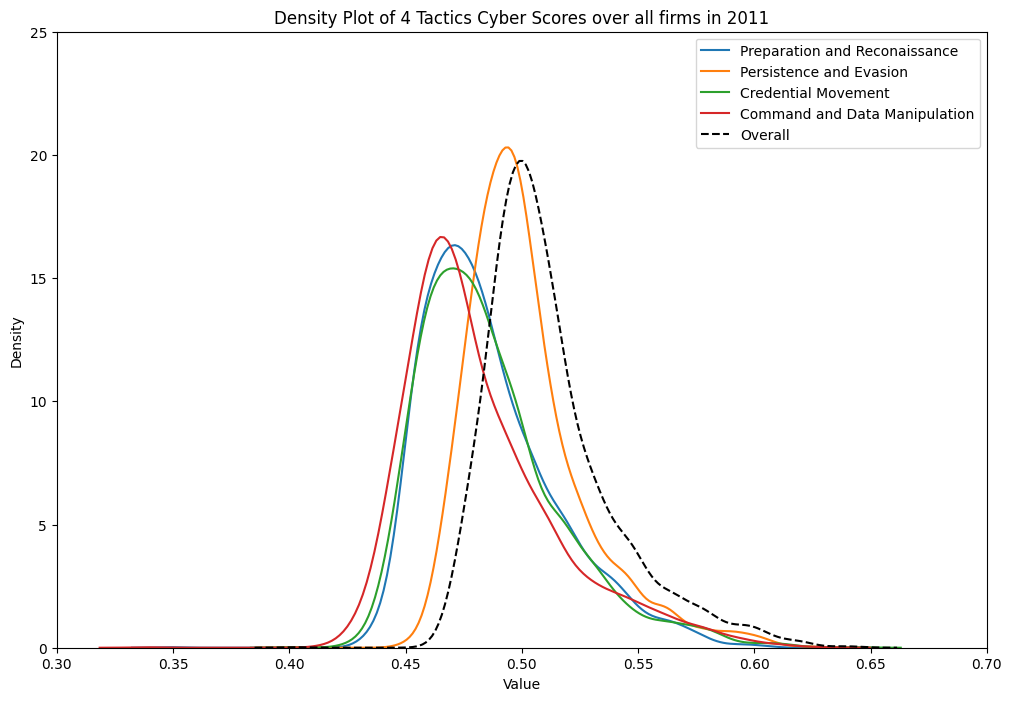

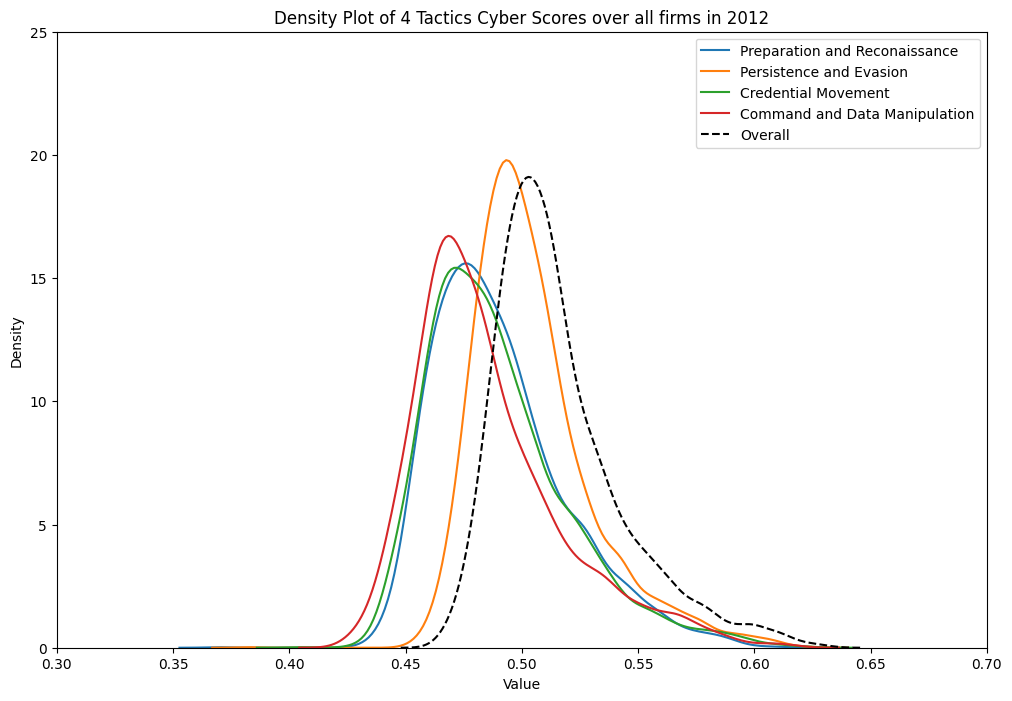

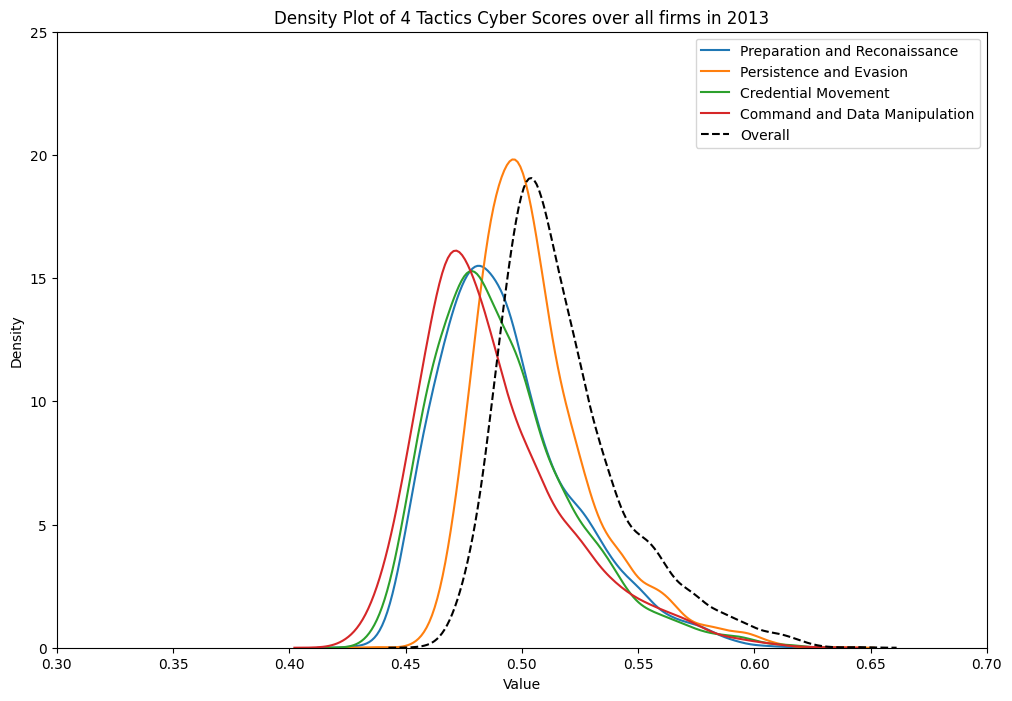

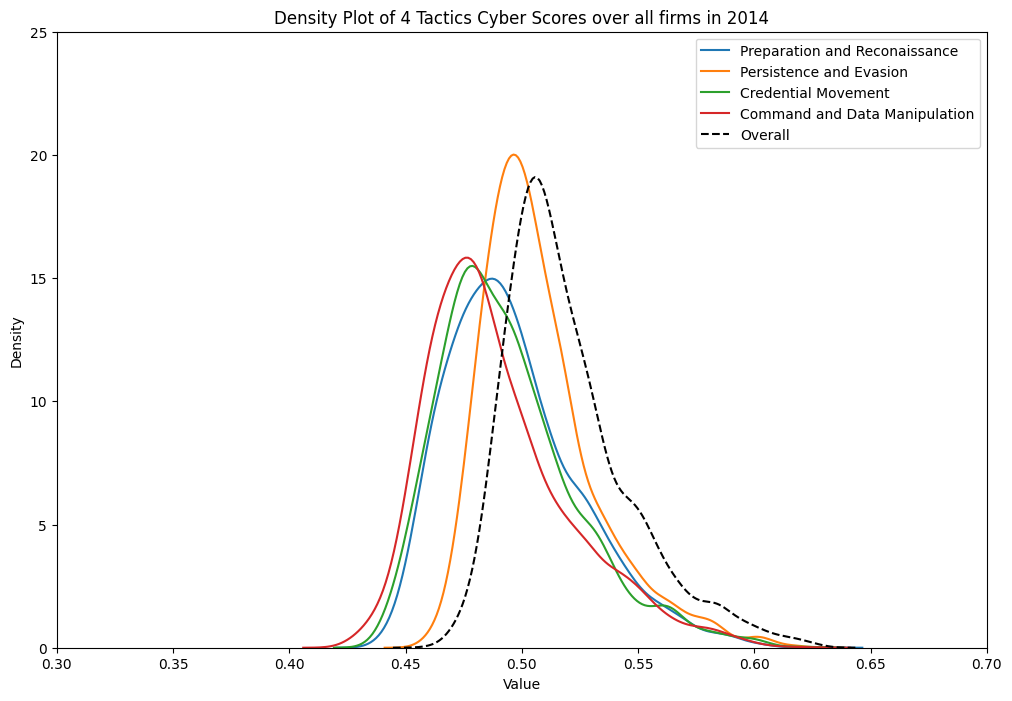

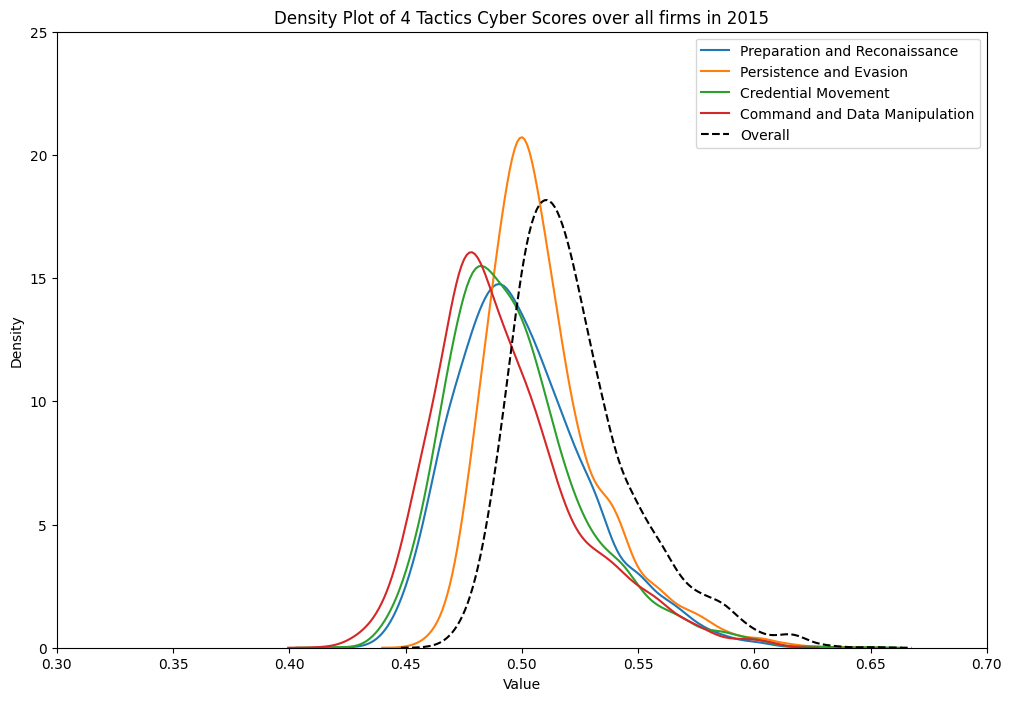

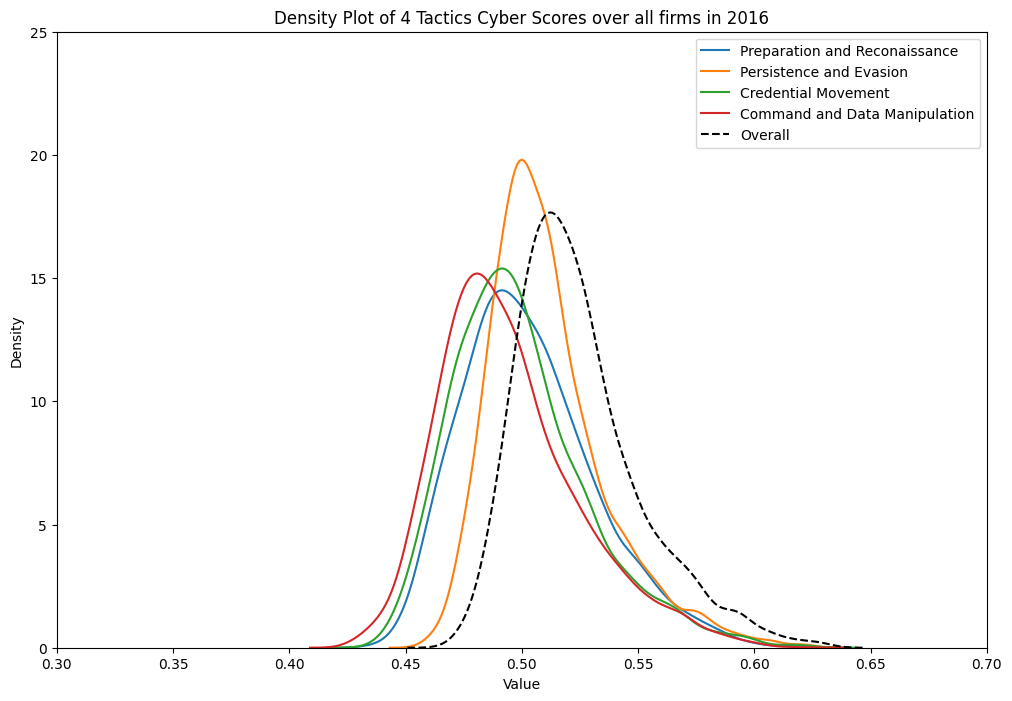

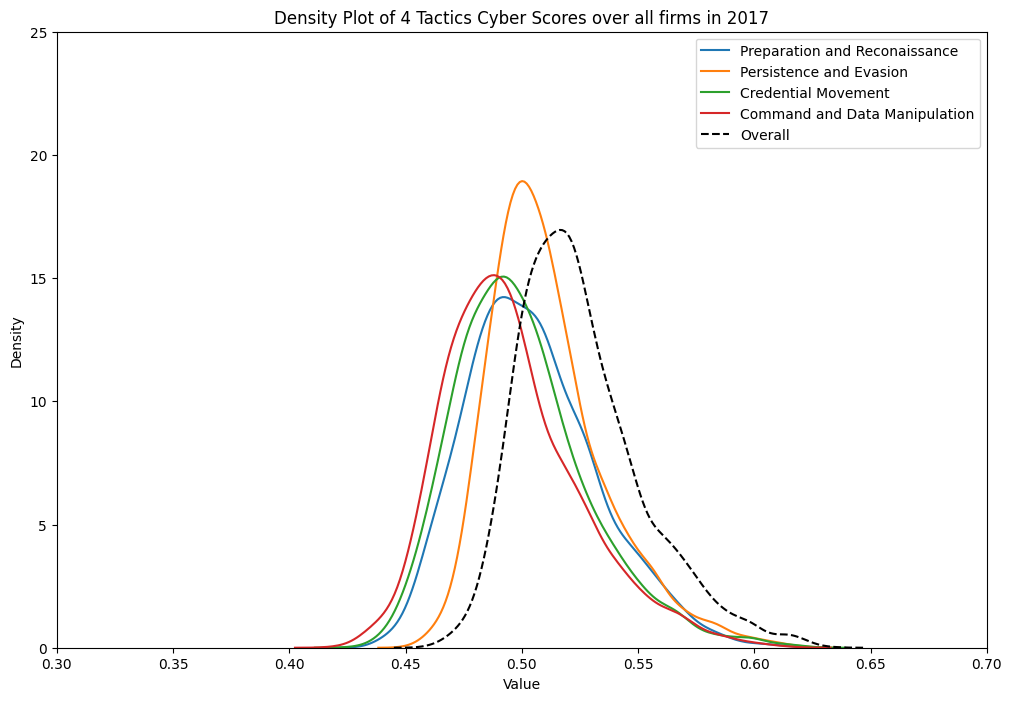

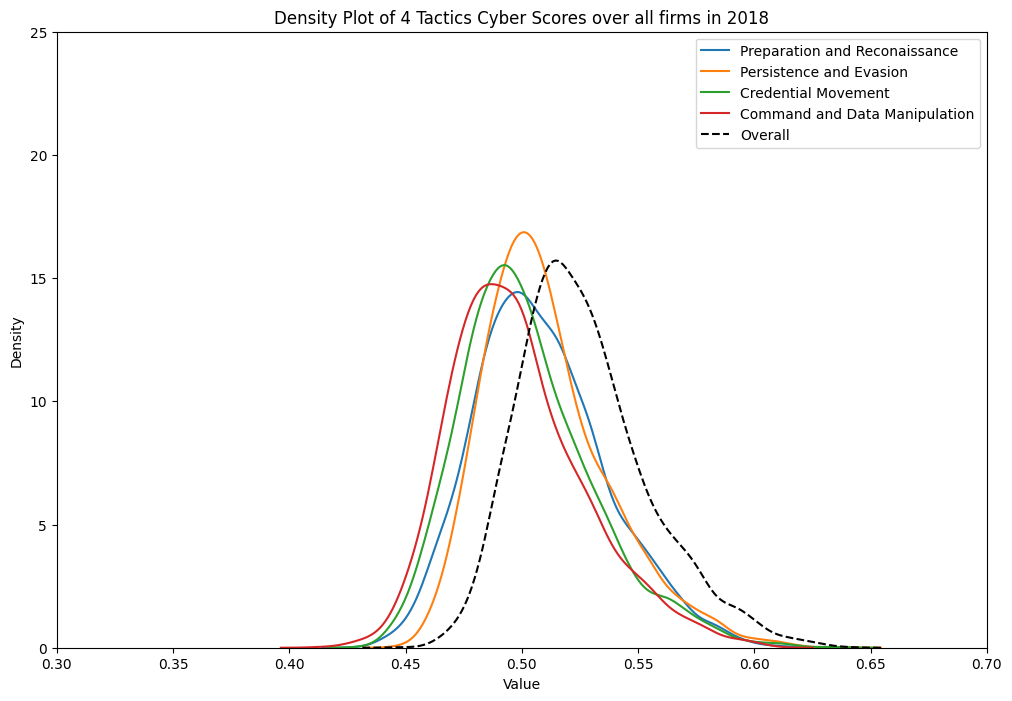

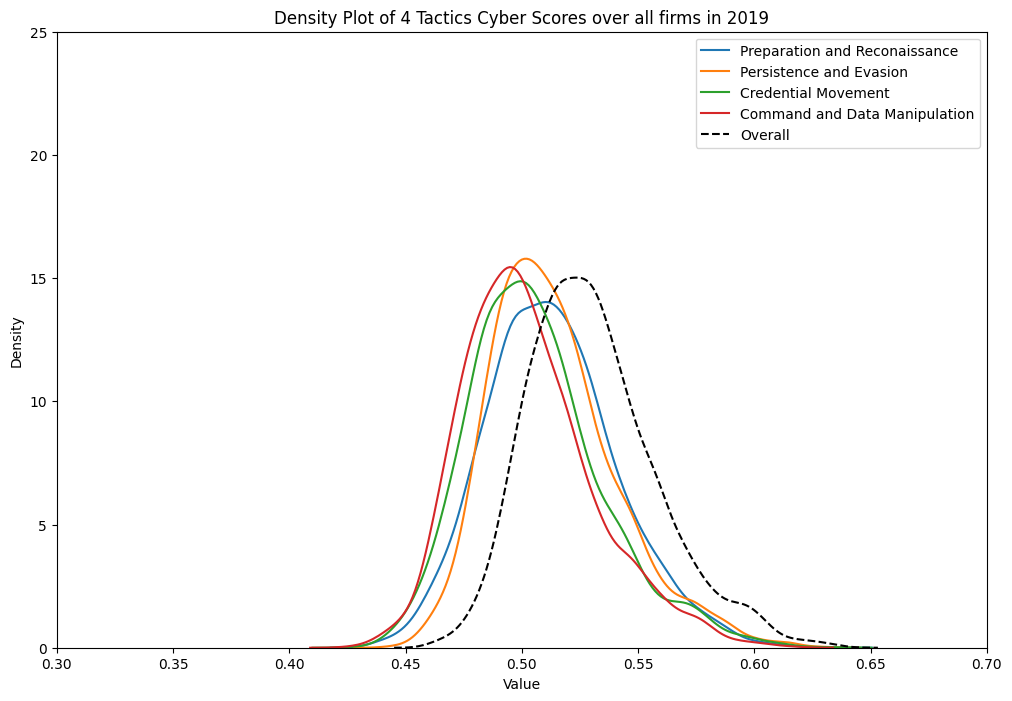

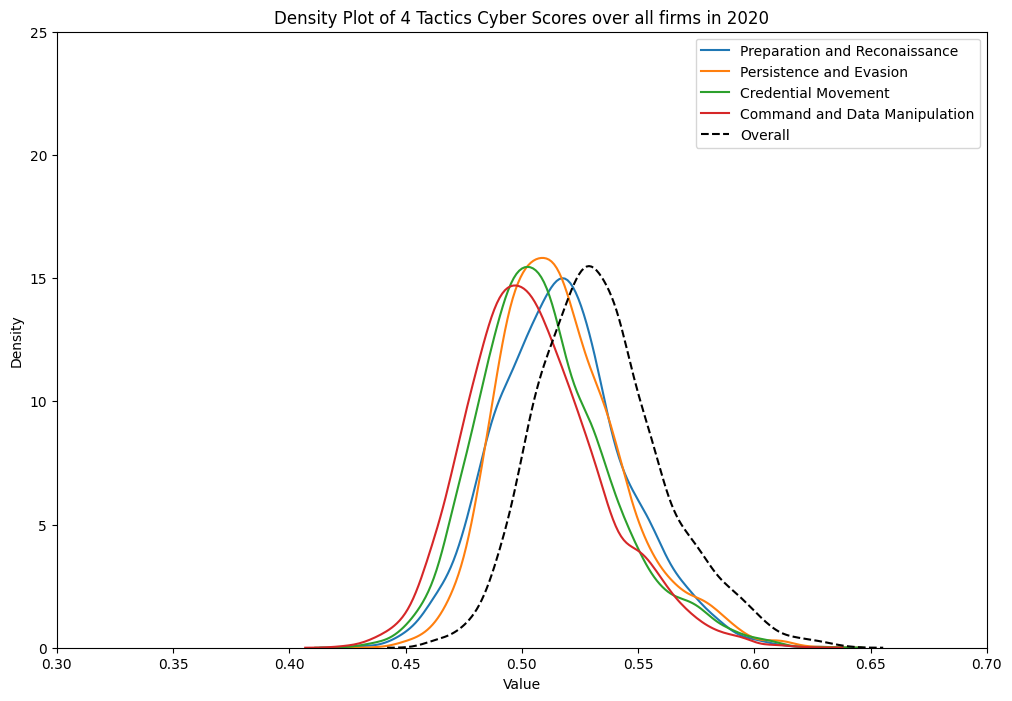

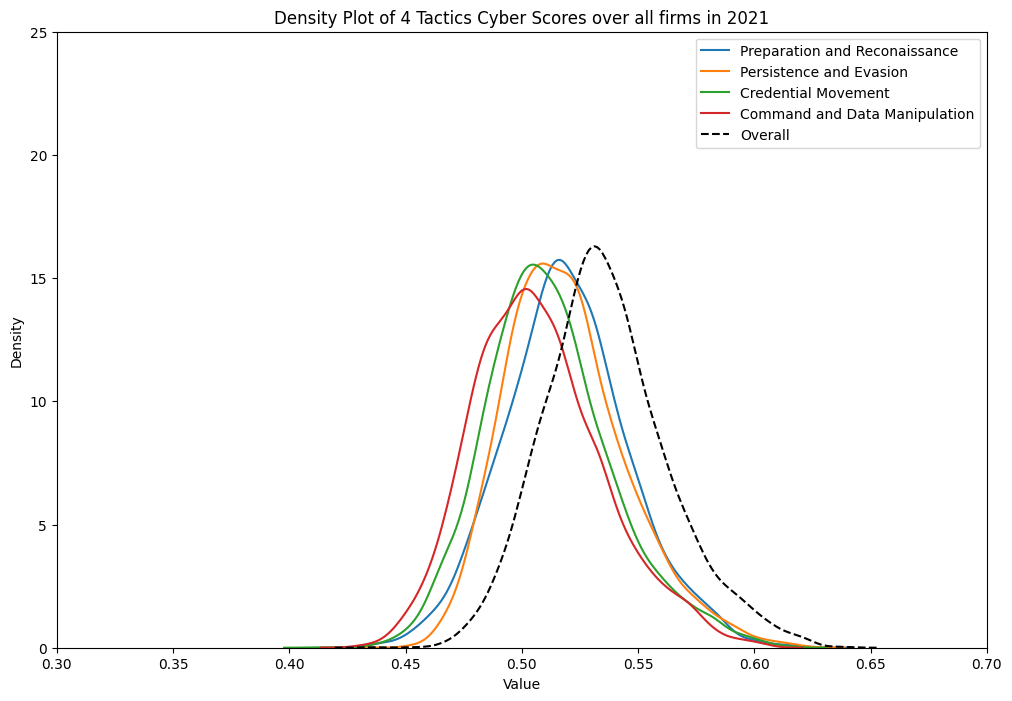

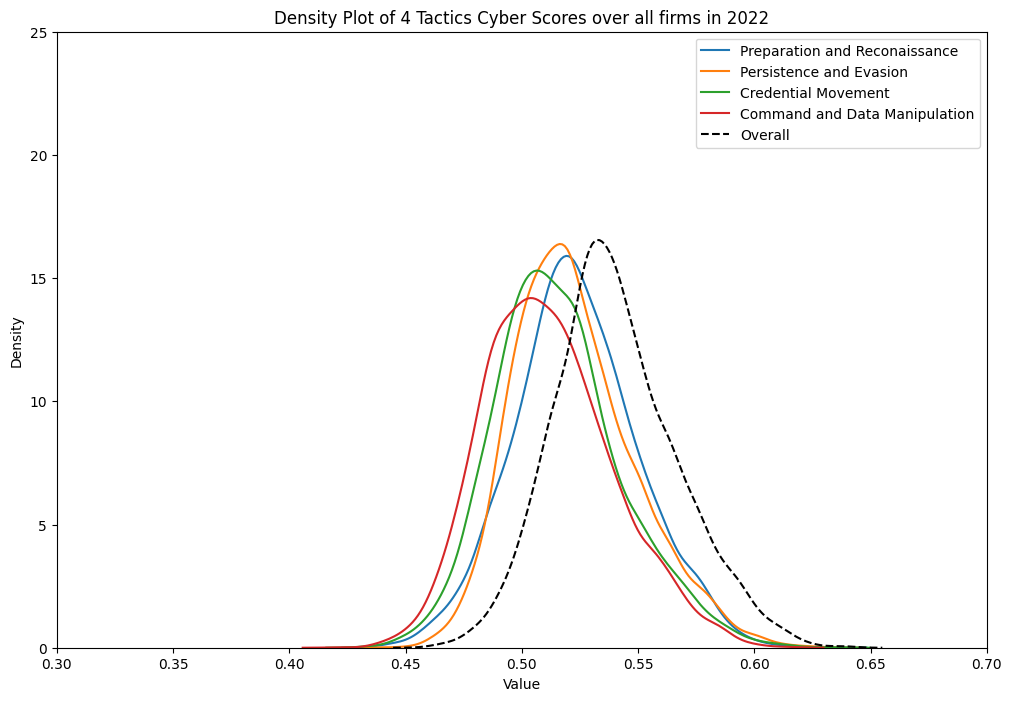

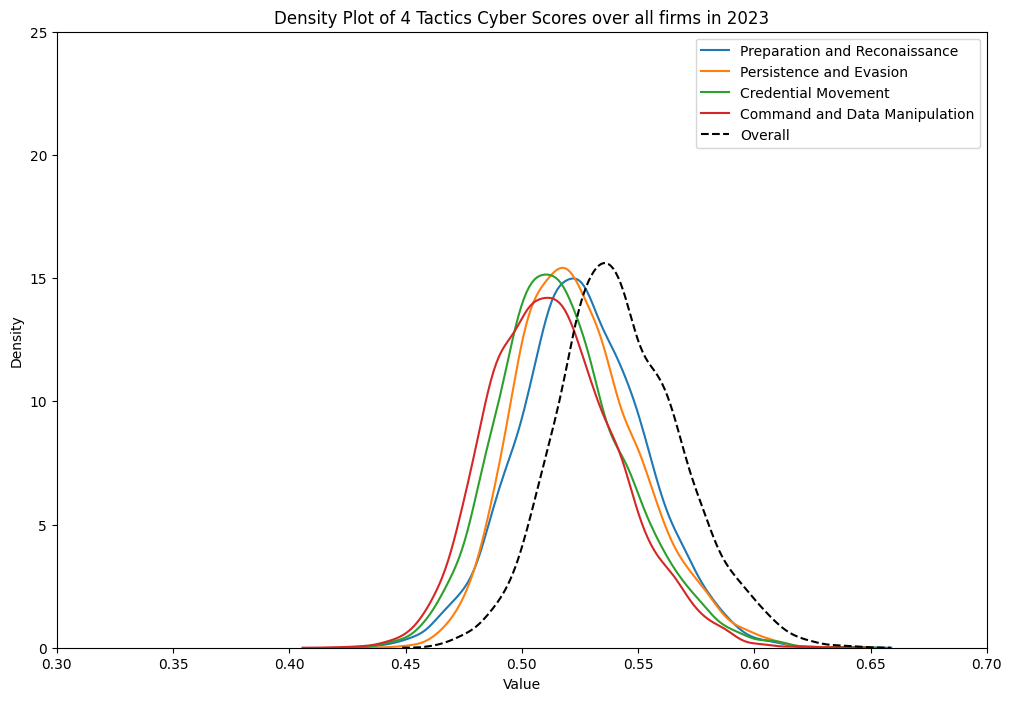

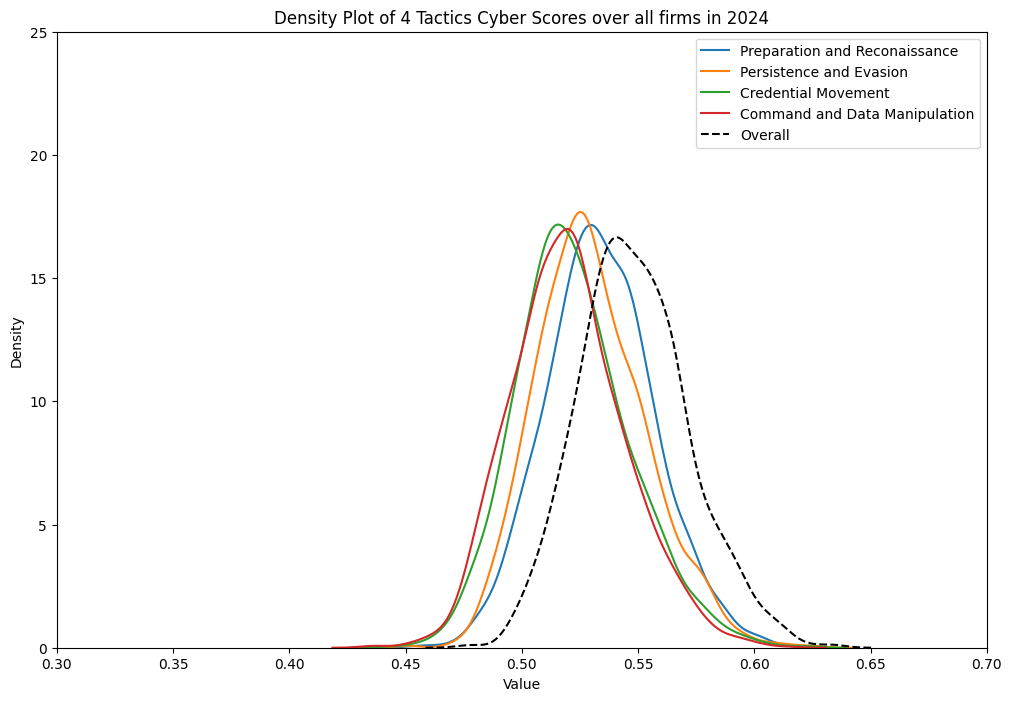

In [35]:
# Define a custom color palette for tactics
palette = sns.color_palette("tab10", n_colors=14)

years = np.arange(2007, 2025)
aggregate_cyber_score = []
aggregate_cyber_score_overall = []
for year in years:
    list_4_scores=[]
    
    for i, (key, color) in enumerate(zip(list(histo_cyber[str(year)].keys()), palette)):
        sns.kdeplot(histo_cyber[str(year)][key], common_norm=True, label=key, color=color)

        list_4_scores.append(np.mean(histo_cyber[str(year)][key]))

    sns.kdeplot(histo_cyber_overall[str(year)],common_norm=True, label="Overall" ,color="black",linestyle="--")
    
    plt.title('Density Plot of 4 Tactics Cyber Scores over all firms in ' + str(year) )
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim([0.3, 0.7])
    plt.ylim([0,25])
    plt.legend()

    # Save the plot
    plot_path = "cyber_score_dictionnary/super_cyber_score_density_" + str(year) + ".png"
    plt.savefig(plot_path)
    
    # Show the plot (optional)
    plt.show()

    aggregate_cyber_score.append(list_4_scores)

    aggregate_cyber_score_overall.append(np.mean(histo_cyber_overall[str(year)]))

    name_tactic=list(histo_cyber[str(year)].keys())

In [36]:
aggregate_cyber_score=np.array(aggregate_cyber_score)
aggregate_cyber_score_overall=np.array(aggregate_cyber_score_overall)

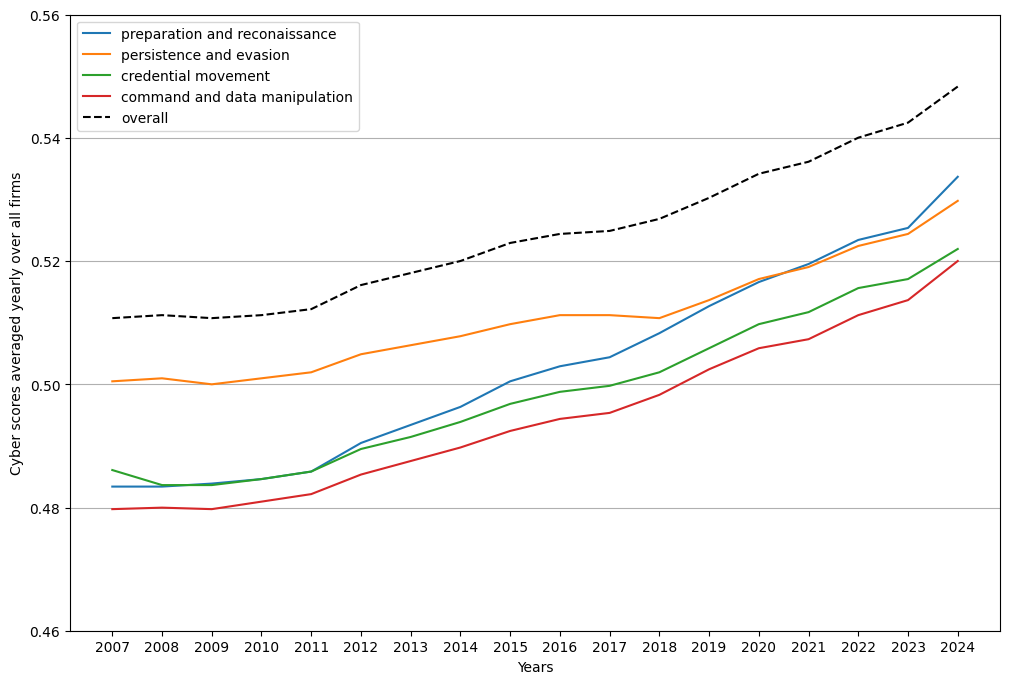

In [37]:
palette = sns.color_palette("tab10", n_colors=4)
for j,tactic in enumerate(name_tactic):
    plt.plot(years,aggregate_cyber_score[:,j],label=tactic.lower(),color=palette[j])

plt.plot(years, aggregate_cyber_score_overall, label="overall",color="black",linestyle="--")
plt.legend()
#plt.title("Evolution of 4 'super' tactics of cyber scores averaged yearly over all firms")
plt.xlabel('Years')
plt.ylabel('Cyber scores averaged yearly over all firms')
plt.xticks(years)
plt.yticks([0.46,0.48,0.50, 0.52, 0.54, 0.56])  # Set custom ticks on y-axis
plt.grid(axis='y')  # Add horizontal grid only
plt.show()